In [1]:
# Import TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Import data handling and preprocessing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

# Import visualization libraries
import matplotlib.pyplot as plt

# Import OS for file path handling
import os

In [2]:
import requests # Added for fetching images from URL
import io       # Added for handling image bytes
from requests.adapters import HTTPAdapter # For retries
from urllib3.util.retry import Retry # For retries
from tqdm import tqdm # For progress bar

# Load dataset information
df = pd.read_csv("D:\ML_ASIF_OWN PROJCET\Handwritten_Letter_Indentification\english.csv")

# Encode labels properly
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])  # Convert labels to unique integers

# Save mapping for reference
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Define the base URL for the images in the GitHub repository
base_image_url = "D:\ML_ASIF_OWN PROJCET\Handwritten_Letter_Indentification\PNG"
# Create a new column with the full image URLs
df["full_image_url"] = base_image_url + df["image"]

# Configure requests session for retries and timeouts for more robust fetching
session = requests.Session()
# Retry strategy: 5 retries, exponential backoff, retry on specific status codes
retries = Retry(total=5, backoff_factor=1, status_forcelist=[429, 500, 502, 503, 504])
session.mount('http://', HTTPAdapter(max_retries=retries))
session.mount('https://', HTTPAdapter(max_retries=retries))

# Load images and labels
img_size = 64
x, y = [], [] # Initialize as empty lists to store loaded images and labels
failed_image_urls = [] # To keep track of images that failed to load and their errors

print(f"Attempting to load {len(df)} images from GitHub...")
# Iterate through the DataFrame to get image URLs and their corresponding labels
# Use tqdm for a progress bar to monitor the loading process
for index, row in tqdm(df.iterrows(), total=len(df), desc="Loading images"):
    img_url = row["full_image_url"]
    current_label = row["label"] # This is the already encoded integer label

    try:
        # Fetch the image content from the URL using requests
        # Add a timeout to prevent requests from hanging indefinitely
        response = session.get(img_url, timeout=15) # Increased timeout for potentially slow connections
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)

        # Use io.BytesIO to treat the image content (bytes) as a file-like object
        img_bytes = io.BytesIO(response.content)
        
        # Load the image from the bytes object, not directly from the URL string.
        # Keras's load_img can accept a file-like object.
        img = load_img(img_bytes, color_mode="grayscale", target_size=(img_size, img_size))
        img = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
        x.append(img)
        y.append(current_label)

    except requests.exceptions.RequestException as e:
        # Catch network-related errors, timeouts, or HTTP errors
        print(f"Warning: Could not download image {img_url}. Error: {e}", flush=True)
        failed_image_urls.append((img_url, str(e)))
    except Exception as e:
        # Catch other potential errors during image processing (e.g., PIL errors if image is corrupt)
        print(f"Warning: Could not process image {img_url}. Error: {e}", flush=True)
        failed_image_urls.append((img_url, str(e)))

# Convert lists of images and labels to NumPy arrays
x = np.array(x).reshape(-1, img_size, img_size, 1)  # Add channel dimension (1 for grayscale)
y = np.array(y)  # Labels are already integers

print(f"\nSuccessfully loaded {len(x)} images.")
if failed_image_urls:
    print(f"Failed to load {len(failed_image_urls)} images. Examples of failed URLs:")
    for url, error in failed_image_urls[:5]: # Print first 5 failed URLs and their errors
        print(f"- {url}: {error}")

# Get unique class labels from the label encoder
class_names = label_encoder.classes_  
print(f'Total classes: {len(class_names)}')
print(f'Classes: {class_names}')

<>:8: SyntaxWarning: invalid escape sequence '\M'
<>:19: SyntaxWarning: invalid escape sequence '\M'
<>:8: SyntaxWarning: invalid escape sequence '\M'
<>:19: SyntaxWarning: invalid escape sequence '\M'
C:\Users\User\AppData\Local\Temp\ipykernel_9892\4093955910.py:8: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("D:\ML_ASIF_OWN PROJCET\Handwritten_Letter_Indentification\english.csv")
C:\Users\User\AppData\Local\Temp\ipykernel_9892\4093955910.py:19: SyntaxWarning: invalid escape sequence '\M'
  base_image_url = "D:\ML_ASIF_OWN PROJCET\Handwritten_Letter_Indentification\PNG"


Label Mapping: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8), np.int64(9): np.int64(9), np.int64(10): np.int64(10), np.int64(11): np.int64(11), np.int64(12): np.int64(12), np.int64(13): np.int64(13), np.int64(14): np.int64(14), np.int64(15): np.int64(15), np.int64(16): np.int64(16), np.int64(17): np.int64(17), np.int64(18): np.int64(18), np.int64(19): np.int64(19), np.int64(20): np.int64(20), np.int64(21): np.int64(21), np.int64(22): np.int64(22), np.int64(23): np.int64(23), np.int64(24): np.int64(24), np.int64(25): np.int64(25), np.int64(26): np.int64(26), np.int64(27): np.int64(27), np.int64(28): np.int64(28), np.int64(29): np.int64(29), np.int64(30): np.int64(30), np.int64(31): np.int64(31), np.int64(32): np.int64(32), np.int64(33): np.int64(33), np.int64(34): np.int64(34), np.int64(35): np.int64(3

Loading images:   0%|          | 0/6200 [00:00<?, ?it/s]

Loading images:   0%|          | 13/6200 [00:00<00:47, 128.90it/s]

Loading images:   1%|          | 54/6200 [00:00<00:20, 292.77it/s]

Loading images:   1%|▏         | 84/6200 [00:00<00:25, 241.58it/s]

Loading images:   2%|▏         | 110/6200 [00:00<00:52, 116.01it/s]

Loading images:   2%|▏         | 128/6200 [00:01<01:11, 84.56it/s] 

Loading images:   2%|▏         | 141/6200 [00:01<01:26, 70.03it/s]

Loading images:   2%|▏         | 152/6200 [00:01<01:29, 67.75it/s]

Loading images:   3%|▎         | 161/6200 [00:01<01:37, 61.89it/s]

Loading images:   3%|▎         | 169/6200 [00:02<01:42, 58.72it/s]

Loading images:   3%|▎         | 176/6200 [00:02<01:39, 60.59it/s]

Loading images:   3%|▎         | 184/6200 [00:02<01:35, 63.01it/s]

Loading images:   3%|▎         | 193/6200 [00:02<01:29, 67.46it/s]

Loading images:   3%|▎         | 201/6200 [00:02<01:27, 68.82it/s]

Loading images:   3%|▎         | 209/6200 [00:02<01:23, 71.40it/s]

Loading images:   4%|▎         | 218/6200 [00:02<01:19, 75.47it/s]

Loading images:   4%|▎         | 226/6200 [00:02<01:18, 75.82it/s]

Loading images:   4%|▍         | 234/6200 [00:02<01:31, 65.53it/s]

Loading images:   4%|▍         | 244/6200 [00:03<01:21, 72.99it/s]

Loading images:   4%|▍         | 255/6200 [00:03<01:14, 79.90it/s]

Loading images:   4%|▍         | 264/6200 [00:03<01:16, 77.15it/s]

Loading images:   4%|▍         | 272/6200 [00:03<01:26, 68.80it/s]

Loading images:   5%|▍         | 284/6200 [00:03<01:13, 80.40it/s]

Loading images:   5%|▍         | 293/6200 [00:03<01:11, 82.26it/s]

Loading images:   5%|▍         | 302/6200 [00:03<01:17, 76.26it/s]

Loading images:   5%|▌         | 325/6200 [00:03<00:51, 114.48it/s]

Loading images:   5%|▌         | 338/6200 [00:03<00:50, 116.73it/s]

Loading images:   6%|▌         | 359/6200 [00:04<00:41, 140.96it/s]

Loading images:   6%|▌         | 374/6200 [00:04<00:55, 104.10it/s]

Loading images:   6%|▌         | 387/6200 [00:04<01:05, 88.38it/s] 

Loading images:   6%|▋         | 400/6200 [00:04<01:01, 93.73it/s]

Loading images:   7%|▋         | 411/6200 [00:04<01:04, 89.27it/s]

Loading images:   7%|▋         | 421/6200 [00:04<01:17, 74.29it/s]

Loading images:   7%|▋         | 430/6200 [00:05<01:14, 77.32it/s]

Loading images:   7%|▋         | 449/6200 [00:05<00:56, 102.24it/s]

Loading images:   8%|▊         | 468/6200 [00:05<00:49, 115.68it/s]

Loading images:   8%|▊         | 481/6200 [00:05<00:57, 100.25it/s]

Loading images:   8%|▊         | 492/6200 [00:05<01:15, 75.80it/s] 

Loading images:   8%|▊         | 501/6200 [00:05<01:15, 75.44it/s]

Loading images:   8%|▊         | 521/6200 [00:05<00:56, 101.25it/s]

Loading images:   9%|▊         | 542/6200 [00:06<00:45, 125.19it/s]

Loading images:   9%|▉         | 557/6200 [00:06<00:53, 106.29it/s]

Loading images:   9%|▉         | 573/6200 [00:06<00:48, 116.97it/s]

Loading images:   9%|▉         | 587/6200 [00:06<00:53, 104.70it/s]

Loading images:  10%|▉         | 599/6200 [00:06<01:09, 80.37it/s] 

Loading images:  10%|▉         | 609/6200 [00:06<01:18, 71.20it/s]

Loading images:  10%|▉         | 618/6200 [00:07<01:22, 67.59it/s]

Loading images:  10%|█         | 626/6200 [00:07<01:51, 49.80it/s]

Loading images:  10%|█         | 633/6200 [00:07<01:48, 51.42it/s]

Loading images:  10%|█         | 646/6200 [00:07<01:27, 63.29it/s]

Loading images:  11%|█         | 654/6200 [00:07<01:44, 53.28it/s]

Loading images:  11%|█         | 661/6200 [00:08<01:40, 54.91it/s]

Loading images:  11%|█         | 668/6200 [00:08<01:47, 51.41it/s]

Loading images:  11%|█         | 674/6200 [00:08<01:53, 48.79it/s]

Loading images:  11%|█         | 680/6200 [00:08<01:48, 51.04it/s]

Loading images:  11%|█         | 692/6200 [00:08<01:24, 65.11it/s]

Loading images:  11%|█▏        | 701/6200 [00:08<01:20, 68.36it/s]

Loading images:  12%|█▏        | 713/6200 [00:08<01:09, 79.17it/s]

Loading images:  12%|█▏        | 722/6200 [00:08<01:21, 66.98it/s]

Loading images:  12%|█▏        | 734/6200 [00:09<01:10, 77.38it/s]

Loading images:  12%|█▏        | 752/6200 [00:09<00:53, 102.31it/s]

Loading images:  12%|█▏        | 764/6200 [00:09<01:08, 79.10it/s] 

Loading images:  12%|█▏        | 774/6200 [00:09<01:40, 53.90it/s]

Loading images:  13%|█▎        | 782/6200 [00:10<01:54, 47.29it/s]

Loading images:  13%|█▎        | 790/6200 [00:10<01:44, 51.84it/s]

Loading images:  13%|█▎        | 797/6200 [00:10<01:45, 51.18it/s]

Loading images:  13%|█▎        | 804/6200 [00:10<01:46, 50.85it/s]

Loading images:  13%|█▎        | 810/6200 [00:10<01:45, 50.85it/s]

Loading images:  13%|█▎        | 817/6200 [00:10<01:41, 53.02it/s]

Loading images:  13%|█▎        | 828/6200 [00:10<01:21, 65.99it/s]

Loading images:  13%|█▎        | 836/6200 [00:10<01:33, 57.49it/s]

Loading images:  14%|█▎        | 843/6200 [00:11<02:15, 39.67it/s]

Loading images:  14%|█▎        | 850/6200 [00:11<01:58, 44.97it/s]

Loading images:  14%|█▍        | 857/6200 [00:11<01:48, 49.31it/s]

Loading images:  14%|█▍        | 863/6200 [00:11<01:57, 45.27it/s]

Loading images:  14%|█▍        | 869/6200 [00:11<02:23, 37.07it/s]

Loading images:  14%|█▍        | 875/6200 [00:11<02:16, 39.04it/s]

Loading images:  14%|█▍        | 887/6200 [00:12<01:35, 55.36it/s]

Loading images:  14%|█▍        | 896/6200 [00:12<01:24, 62.99it/s]

Loading images:  15%|█▍        | 904/6200 [00:12<01:25, 61.75it/s]

Loading images:  15%|█▍        | 920/6200 [00:12<01:02, 83.84it/s]

Loading images:  15%|█▌        | 930/6200 [00:12<01:34, 55.68it/s]

Loading images:  15%|█▌        | 938/6200 [00:12<01:46, 49.25it/s]

Loading images:  15%|█▌        | 945/6200 [00:13<01:40, 52.13it/s]

Loading images:  15%|█▌        | 952/6200 [00:13<02:03, 42.63it/s]

Loading images:  15%|█▌        | 958/6200 [00:13<02:08, 40.66it/s]

Loading images:  16%|█▌        | 963/6200 [00:13<02:09, 40.47it/s]

Loading images:  16%|█▌        | 968/6200 [00:13<02:08, 40.68it/s]

Loading images:  16%|█▌        | 976/6200 [00:13<01:48, 48.24it/s]

Loading images:  16%|█▌        | 982/6200 [00:13<01:48, 48.18it/s]

Loading images:  16%|█▌        | 988/6200 [00:14<01:46, 48.90it/s]

Loading images:  16%|█▌        | 994/6200 [00:14<01:58, 44.11it/s]

Loading images:  16%|█▌        | 1000/6200 [00:14<01:50, 47.14it/s]

Loading images:  16%|█▌        | 1005/6200 [00:14<02:26, 35.43it/s]

Loading images:  16%|█▋        | 1010/6200 [00:14<02:57, 29.25it/s]

Loading images:  16%|█▋        | 1016/6200 [00:14<02:32, 33.94it/s]

Loading images:  16%|█▋        | 1023/6200 [00:15<02:17, 37.60it/s]

Loading images:  17%|█▋        | 1030/6200 [00:15<01:57, 43.87it/s]

Loading images:  17%|█▋        | 1035/6200 [00:15<01:55, 44.70it/s]

Loading images:  17%|█▋        | 1042/6200 [00:15<01:45, 48.96it/s]

Loading images:  17%|█▋        | 1050/6200 [00:15<01:32, 55.71it/s]

Loading images:  17%|█▋        | 1058/6200 [00:15<01:25, 60.09it/s]

Loading images:  17%|█▋        | 1082/6200 [00:15<00:48, 104.86it/s]

Loading images:  18%|█▊        | 1113/6200 [00:15<00:31, 159.28it/s]

Loading images:  18%|█▊        | 1142/6200 [00:16<00:26, 192.49it/s]

Loading images:  19%|█▊        | 1162/6200 [00:16<00:42, 118.04it/s]

Loading images:  19%|█▉        | 1178/6200 [00:16<00:46, 107.48it/s]

Loading images:  19%|█▉        | 1192/6200 [00:16<00:52, 95.02it/s] 

Loading images:  19%|█▉        | 1204/6200 [00:16<00:55, 90.08it/s]

Loading images:  20%|█▉        | 1215/6200 [00:17<00:55, 90.28it/s]

Loading images:  20%|█▉        | 1226/6200 [00:17<01:02, 78.98it/s]

Loading images:  20%|█▉        | 1235/6200 [00:17<01:14, 67.07it/s]

Loading images:  20%|██        | 1253/6200 [00:17<00:56, 87.80it/s]

Loading images:  20%|██        | 1264/6200 [00:17<00:58, 84.43it/s]

Loading images:  21%|██        | 1299/6200 [00:17<00:34, 141.57it/s]

Loading images:  21%|██▏       | 1325/6200 [00:17<00:29, 166.14it/s]

Loading images:  22%|██▏       | 1345/6200 [00:18<00:40, 119.40it/s]

Loading images:  22%|██▏       | 1361/6200 [00:18<00:46, 104.04it/s]

Loading images:  22%|██▏       | 1375/6200 [00:18<00:50, 95.60it/s] 

Loading images:  22%|██▏       | 1387/6200 [00:18<01:01, 78.19it/s]

Loading images:  23%|██▎       | 1401/6200 [00:18<00:55, 87.22it/s]

Loading images:  23%|██▎       | 1412/6200 [00:19<00:56, 84.53it/s]

Loading images:  23%|██▎       | 1422/6200 [00:19<00:59, 79.91it/s]

Loading images:  23%|██▎       | 1431/6200 [00:19<01:01, 77.51it/s]

Loading images:  23%|██▎       | 1441/6200 [00:19<00:58, 82.04it/s]

Loading images:  23%|██▎       | 1450/6200 [00:19<00:59, 79.65it/s]

Loading images:  24%|██▎       | 1459/6200 [00:19<01:05, 72.45it/s]

Loading images:  24%|██▎       | 1467/6200 [00:19<01:11, 65.94it/s]

Loading images:  24%|██▍       | 1477/6200 [00:19<01:05, 72.06it/s]

Loading images:  24%|██▍       | 1485/6200 [00:20<01:20, 58.26it/s]

Loading images:  24%|██▍       | 1492/6200 [00:20<02:07, 37.06it/s]

Loading images:  24%|██▍       | 1499/6200 [00:20<01:53, 41.35it/s]

Loading images:  24%|██▍       | 1505/6200 [00:20<01:57, 39.84it/s]

Loading images:  24%|██▍       | 1510/6200 [00:20<01:52, 41.74it/s]

Loading images:  24%|██▍       | 1517/6200 [00:21<01:47, 43.70it/s]

Loading images:  25%|██▍       | 1525/6200 [00:21<01:37, 47.82it/s]

Loading images:  25%|██▍       | 1533/6200 [00:21<01:30, 51.47it/s]

Loading images:  25%|██▍       | 1539/6200 [00:21<01:47, 43.35it/s]

Loading images:  25%|██▍       | 1544/6200 [00:21<01:45, 44.18it/s]

Loading images:  25%|██▌       | 1550/6200 [00:21<01:42, 45.43it/s]

Loading images:  25%|██▌       | 1555/6200 [00:21<01:46, 43.62it/s]

Loading images:  25%|██▌       | 1561/6200 [00:22<01:40, 46.17it/s]

Loading images:  25%|██▌       | 1566/6200 [00:22<02:04, 37.12it/s]

Loading images:  25%|██▌       | 1571/6200 [00:22<02:06, 36.61it/s]

Loading images:  25%|██▌       | 1576/6200 [00:22<01:57, 39.22it/s]

Loading images:  26%|██▌       | 1581/6200 [00:22<02:06, 36.57it/s]

Loading images:  26%|██▌       | 1585/6200 [00:22<02:23, 32.10it/s]

Loading images:  26%|██▌       | 1591/6200 [00:22<02:01, 37.81it/s]

Loading images:  26%|██▌       | 1596/6200 [00:23<01:59, 38.67it/s]

Loading images:  26%|██▌       | 1605/6200 [00:23<01:30, 50.87it/s]

Loading images:  26%|██▌       | 1611/6200 [00:23<01:26, 52.77it/s]

Loading images:  26%|██▌       | 1617/6200 [00:23<01:32, 49.56it/s]

Loading images:  26%|██▌       | 1623/6200 [00:23<01:31, 50.15it/s]

Loading images:  26%|██▋       | 1629/6200 [00:23<01:28, 51.68it/s]

Loading images:  26%|██▋       | 1642/6200 [00:23<01:04, 70.64it/s]

Loading images:  27%|██▋       | 1651/6200 [00:23<01:01, 74.20it/s]

Loading images:  27%|██▋       | 1659/6200 [00:24<01:08, 66.30it/s]

Loading images:  27%|██▋       | 1666/6200 [00:24<01:17, 58.85it/s]

Loading images:  27%|██▋       | 1673/6200 [00:24<01:22, 54.72it/s]

Loading images:  27%|██▋       | 1679/6200 [00:24<01:23, 54.10it/s]

Loading images:  27%|██▋       | 1685/6200 [00:24<01:21, 55.22it/s]

Loading images:  27%|██▋       | 1694/6200 [00:24<01:12, 62.28it/s]

Loading images:  27%|██▋       | 1704/6200 [00:24<01:02, 71.78it/s]

Loading images:  28%|██▊       | 1713/6200 [00:24<00:58, 76.31it/s]

Loading images:  28%|██▊       | 1731/6200 [00:24<00:43, 103.63it/s]

Loading images:  28%|██▊       | 1743/6200 [00:25<00:42, 104.46it/s]

Loading images:  28%|██▊       | 1759/6200 [00:25<00:37, 118.75it/s]

Loading images:  29%|██▉       | 1787/6200 [00:25<00:27, 159.12it/s]

Loading images:  29%|██▉       | 1803/6200 [00:25<00:31, 139.70it/s]

Loading images:  30%|██▉       | 1832/6200 [00:25<00:24, 178.46it/s]

Loading images:  30%|██▉       | 1851/6200 [00:25<00:28, 153.33it/s]

Loading images:  30%|███       | 1883/6200 [00:25<00:22, 193.94it/s]

Loading images:  31%|███       | 1905/6200 [00:26<00:33, 126.40it/s]

Loading images:  31%|███       | 1922/6200 [00:26<00:44, 96.96it/s] 

Loading images:  31%|███       | 1936/6200 [00:26<00:42, 100.24it/s]

Loading images:  32%|███▏      | 1959/6200 [00:26<00:34, 123.87it/s]

Loading images:  32%|███▏      | 1975/6200 [00:26<00:38, 109.14it/s]

Loading images:  32%|███▏      | 1989/6200 [00:27<00:42, 99.95it/s] 

Loading images:  32%|███▏      | 2001/6200 [00:27<00:43, 97.15it/s]

Loading images:  32%|███▏      | 2012/6200 [00:27<00:50, 83.41it/s]

Loading images:  33%|███▎      | 2022/6200 [00:27<00:53, 77.98it/s]

Loading images:  33%|███▎      | 2031/6200 [00:27<00:57, 72.56it/s]

Loading images:  33%|███▎      | 2040/6200 [00:27<00:54, 75.78it/s]

Loading images:  33%|███▎      | 2049/6200 [00:27<00:59, 69.82it/s]

Loading images:  33%|███▎      | 2057/6200 [00:28<01:03, 65.74it/s]

Loading images:  33%|███▎      | 2064/6200 [00:28<01:04, 64.55it/s]

Loading images:  33%|███▎      | 2071/6200 [00:28<01:03, 65.34it/s]

Loading images:  34%|███▎      | 2078/6200 [00:28<01:03, 65.28it/s]

Loading images:  34%|███▎      | 2085/6200 [00:28<01:04, 64.25it/s]

Loading images:  34%|███▎      | 2092/6200 [00:28<01:03, 65.01it/s]

Loading images:  34%|███▍      | 2099/6200 [00:28<01:08, 59.49it/s]

Loading images:  34%|███▍      | 2106/6200 [00:28<01:06, 61.11it/s]

Loading images:  34%|███▍      | 2115/6200 [00:28<01:00, 67.92it/s]

Loading images:  34%|███▍      | 2122/6200 [00:29<01:01, 66.27it/s]

Loading images:  34%|███▍      | 2131/6200 [00:29<00:58, 69.10it/s]

Loading images:  34%|███▍      | 2139/6200 [00:29<00:56, 71.96it/s]

Loading images:  35%|███▍      | 2147/6200 [00:29<00:58, 69.88it/s]

Loading images:  35%|███▍      | 2155/6200 [00:29<01:03, 63.78it/s]

Loading images:  35%|███▍      | 2162/6200 [00:29<01:04, 63.03it/s]

Loading images:  35%|███▍      | 2169/6200 [00:29<01:10, 56.81it/s]

Loading images:  35%|███▌      | 2175/6200 [00:30<01:25, 47.35it/s]

Loading images:  35%|███▌      | 2181/6200 [00:30<01:31, 43.88it/s]

Loading images:  35%|███▌      | 2186/6200 [00:30<02:14, 29.94it/s]

Loading images:  35%|███▌      | 2193/6200 [00:30<01:53, 35.33it/s]

Loading images:  35%|███▌      | 2198/6200 [00:30<01:51, 35.75it/s]

Loading images:  36%|███▌      | 2204/6200 [00:30<01:42, 39.11it/s]

Loading images:  36%|███▌      | 2211/6200 [00:31<01:29, 44.76it/s]

Loading images:  36%|███▌      | 2216/6200 [00:31<01:28, 44.92it/s]

Loading images:  36%|███▌      | 2223/6200 [00:31<01:18, 50.78it/s]

Loading images:  36%|███▌      | 2229/6200 [00:31<01:32, 43.14it/s]

Loading images:  36%|███▌      | 2234/6200 [00:31<01:34, 41.90it/s]

Loading images:  36%|███▌      | 2239/6200 [00:31<01:40, 39.32it/s]

Loading images:  36%|███▌      | 2244/6200 [00:31<01:39, 39.66it/s]

Loading images:  36%|███▋      | 2249/6200 [00:31<01:33, 42.10it/s]

Loading images:  36%|███▋      | 2258/6200 [00:32<01:21, 48.39it/s]

Loading images:  37%|███▋      | 2265/6200 [00:32<01:16, 51.12it/s]

Loading images:  37%|███▋      | 2271/6200 [00:32<01:21, 48.14it/s]

Loading images:  37%|███▋      | 2278/6200 [00:32<01:17, 50.87it/s]

Loading images:  37%|███▋      | 2286/6200 [00:32<01:11, 54.82it/s]

Loading images:  37%|███▋      | 2292/6200 [00:32<01:14, 52.62it/s]

Loading images:  37%|███▋      | 2298/6200 [00:32<01:22, 47.25it/s]

Loading images:  37%|███▋      | 2303/6200 [00:33<01:43, 37.76it/s]

Loading images:  37%|███▋      | 2308/6200 [00:33<01:43, 37.64it/s]

Loading images:  37%|███▋      | 2314/6200 [00:33<01:35, 40.77it/s]

Loading images:  37%|███▋      | 2321/6200 [00:33<01:26, 44.69it/s]

Loading images:  38%|███▊      | 2327/6200 [00:33<01:26, 44.65it/s]

Loading images:  38%|███▊      | 2333/6200 [00:33<01:23, 46.27it/s]

Loading images:  38%|███▊      | 2339/6200 [00:33<01:17, 49.62it/s]

Loading images:  38%|███▊      | 2345/6200 [00:33<01:17, 49.99it/s]

Loading images:  38%|███▊      | 2351/6200 [00:34<01:17, 49.83it/s]

Loading images:  38%|███▊      | 2357/6200 [00:34<01:25, 44.82it/s]

Loading images:  38%|███▊      | 2364/6200 [00:34<01:18, 49.11it/s]

Loading images:  38%|███▊      | 2370/6200 [00:34<01:24, 45.46it/s]

Loading images:  38%|███▊      | 2375/6200 [00:34<01:26, 44.06it/s]

Loading images:  38%|███▊      | 2380/6200 [00:34<01:25, 44.87it/s]

Loading images:  38%|███▊      | 2386/6200 [00:34<01:21, 46.51it/s]

Loading images:  39%|███▊      | 2391/6200 [00:34<01:24, 44.84it/s]

Loading images:  39%|███▊      | 2399/6200 [00:35<01:13, 51.93it/s]

Loading images:  39%|███▉      | 2406/6200 [00:35<01:08, 55.75it/s]

Loading images:  39%|███▉      | 2417/6200 [00:35<00:57, 66.06it/s]

Loading images:  39%|███▉      | 2424/6200 [00:35<00:58, 64.41it/s]

Loading images:  39%|███▉      | 2431/6200 [00:35<00:58, 64.08it/s]

Loading images:  39%|███▉      | 2439/6200 [00:35<00:55, 67.18it/s]

Loading images:  40%|███▉      | 2450/6200 [00:35<00:48, 77.50it/s]

Loading images:  40%|███▉      | 2458/6200 [00:35<01:03, 59.32it/s]

Loading images:  40%|███▉      | 2465/6200 [00:36<01:03, 59.02it/s]

Loading images:  40%|███▉      | 2472/6200 [00:36<01:08, 54.40it/s]

Loading images:  40%|███▉      | 2478/6200 [00:36<01:10, 52.44it/s]

Loading images:  40%|████      | 2488/6200 [00:36<01:00, 61.69it/s]

Loading images:  40%|████      | 2500/6200 [00:36<00:49, 74.76it/s]

Loading images:  41%|████      | 2518/6200 [00:36<00:36, 101.32it/s]

Loading images:  41%|████      | 2529/6200 [00:36<00:36, 99.30it/s] 

Loading images:  41%|████      | 2540/6200 [00:36<00:37, 97.90it/s]

Loading images:  41%|████      | 2553/6200 [00:37<00:34, 106.15it/s]

Loading images:  41%|████▏     | 2566/6200 [00:37<00:32, 112.50it/s]

Loading images:  42%|████▏     | 2578/6200 [00:37<00:36, 99.75it/s] 

Loading images:  42%|████▏     | 2614/6200 [00:37<00:21, 166.51it/s]

Loading images:  42%|████▏     | 2632/6200 [00:37<00:21, 166.29it/s]

Loading images:  43%|████▎     | 2662/6200 [00:37<00:17, 202.25it/s]

Loading images:  43%|████▎     | 2684/6200 [00:37<00:16, 207.16it/s]

Loading images:  44%|████▍     | 2713/6200 [00:37<00:16, 211.52it/s]

Loading images:  44%|████▍     | 2735/6200 [00:37<00:17, 198.92it/s]

Loading images:  44%|████▍     | 2756/6200 [00:38<00:21, 160.87it/s]

Loading images:  45%|████▍     | 2783/6200 [00:38<00:18, 185.99it/s]

Loading images:  45%|████▌     | 2805/6200 [00:38<00:17, 191.94it/s]

Loading images:  46%|████▌     | 2826/6200 [00:38<00:23, 141.82it/s]

Loading images:  46%|████▌     | 2843/6200 [00:38<00:24, 137.01it/s]

Loading images:  46%|████▌     | 2859/6200 [00:39<00:34, 96.53it/s] 

Loading images:  46%|████▋     | 2872/6200 [00:39<00:51, 64.54it/s]

Loading images:  46%|████▋     | 2883/6200 [00:39<00:46, 70.66it/s]

Loading images:  47%|████▋     | 2893/6200 [00:40<01:09, 47.89it/s]

Loading images:  47%|████▋     | 2901/6200 [00:40<01:03, 51.57it/s]

Loading images:  47%|████▋     | 2916/6200 [00:40<00:49, 66.41it/s]

Loading images:  47%|████▋     | 2929/6200 [00:40<00:42, 77.79it/s]

Loading images:  47%|████▋     | 2940/6200 [00:40<00:40, 79.68it/s]

Loading images:  48%|████▊     | 2956/6200 [00:40<00:33, 95.78it/s]

Loading images:  48%|████▊     | 2968/6200 [00:40<00:32, 99.45it/s]

Loading images:  48%|████▊     | 2986/6200 [00:40<00:27, 117.21it/s]

Loading images:  48%|████▊     | 3003/6200 [00:40<00:24, 130.42it/s]

Loading images:  49%|████▉     | 3023/6200 [00:41<00:21, 145.85it/s]

Loading images:  49%|████▉     | 3039/6200 [00:41<00:24, 131.28it/s]

Loading images:  49%|████▉     | 3053/6200 [00:41<00:29, 106.77it/s]

Loading images:  49%|████▉     | 3065/6200 [00:41<00:28, 108.52it/s]

Loading images:  50%|████▉     | 3077/6200 [00:41<00:28, 111.26it/s]

Loading images:  50%|████▉     | 3089/6200 [00:41<00:28, 110.37it/s]

Loading images:  50%|█████     | 3101/6200 [00:41<00:27, 112.00it/s]

Loading images:  50%|█████     | 3119/6200 [00:41<00:24, 126.91it/s]

Loading images:  51%|█████     | 3132/6200 [00:41<00:24, 124.69it/s]

Loading images:  51%|█████     | 3145/6200 [00:42<00:27, 112.96it/s]

Loading images:  51%|█████     | 3157/6200 [00:42<00:27, 109.12it/s]

Loading images:  51%|█████     | 3172/6200 [00:42<00:25, 116.78it/s]

Loading images:  51%|█████▏    | 3184/6200 [00:42<00:25, 116.15it/s]

Loading images:  52%|█████▏    | 3196/6200 [00:42<00:26, 113.11it/s]

Loading images:  52%|█████▏    | 3208/6200 [00:42<00:35, 84.27it/s] 

Loading images:  52%|█████▏    | 3218/6200 [00:42<00:34, 86.43it/s]

Loading images:  52%|█████▏    | 3228/6200 [00:43<00:41, 71.21it/s]

Loading images:  52%|█████▏    | 3237/6200 [00:43<00:53, 55.47it/s]

Loading images:  52%|█████▏    | 3244/6200 [00:43<00:57, 51.57it/s]

Loading images:  52%|█████▏    | 3251/6200 [00:43<00:55, 53.23it/s]

Loading images:  53%|█████▎    | 3264/6200 [00:43<00:42, 68.67it/s]

Loading images:  53%|█████▎    | 3273/6200 [00:43<00:40, 72.84it/s]

Loading images:  53%|█████▎    | 3289/6200 [00:44<00:36, 79.24it/s]

Loading images:  53%|█████▎    | 3298/6200 [00:44<01:09, 41.92it/s]

Loading images:  53%|█████▎    | 3305/6200 [00:44<01:05, 43.97it/s]

Loading images:  54%|█████▎    | 3324/6200 [00:44<00:42, 67.69it/s]

Loading images:  54%|█████▍    | 3339/6200 [00:44<00:34, 82.92it/s]

Loading images:  54%|█████▍    | 3351/6200 [00:45<00:31, 89.21it/s]

Loading images:  54%|█████▍    | 3367/6200 [00:45<00:27, 104.91it/s]

Loading images:  55%|█████▍    | 3380/6200 [00:45<00:27, 103.96it/s]

Loading images:  55%|█████▍    | 3392/6200 [00:45<00:37, 75.09it/s] 

Loading images:  55%|█████▍    | 3404/6200 [00:45<00:34, 82.02it/s]

Loading images:  55%|█████▌    | 3415/6200 [00:45<00:32, 86.30it/s]

Loading images:  55%|█████▌    | 3430/6200 [00:45<00:27, 100.00it/s]

Loading images:  56%|█████▌    | 3449/6200 [00:45<00:23, 118.65it/s]

Loading images:  56%|█████▌    | 3463/6200 [00:46<00:24, 113.08it/s]

Loading images:  56%|█████▌    | 3476/6200 [00:46<00:23, 115.75it/s]

Loading images:  56%|█████▋    | 3493/6200 [00:46<00:21, 128.73it/s]

Loading images:  57%|█████▋    | 3507/6200 [00:46<00:20, 130.54it/s]

Loading images:  57%|█████▋    | 3541/6200 [00:46<00:14, 187.98it/s]

Loading images:  58%|█████▊    | 3575/6200 [00:46<00:11, 230.71it/s]

Loading images:  58%|█████▊    | 3602/6200 [00:46<00:10, 241.31it/s]

Loading images:  59%|█████▊    | 3634/6200 [00:46<00:09, 259.23it/s]

Loading images:  59%|█████▉    | 3671/6200 [00:46<00:08, 284.24it/s]

Loading images:  60%|█████▉    | 3701/6200 [00:47<00:08, 287.93it/s]

Loading images:  60%|██████    | 3730/6200 [00:47<00:08, 274.92it/s]

Loading images:  61%|██████    | 3776/6200 [00:47<00:07, 324.18it/s]

Loading images:  61%|██████▏   | 3809/6200 [00:47<00:07, 316.21it/s]

Loading images:  62%|██████▏   | 3841/6200 [00:47<00:08, 289.91it/s]

Loading images:  62%|██████▏   | 3874/6200 [00:47<00:07, 298.54it/s]

Loading images:  63%|██████▎   | 3913/6200 [00:47<00:07, 323.61it/s]

Loading images:  64%|██████▍   | 3969/6200 [00:47<00:05, 386.60it/s]

Loading images:  65%|██████▌   | 4030/6200 [00:47<00:04, 449.29it/s]

Loading images:  66%|██████▌   | 4080/6200 [00:48<00:04, 463.48it/s]

Loading images:  67%|██████▋   | 4127/6200 [00:48<00:05, 367.39it/s]

Loading images:  67%|██████▋   | 4168/6200 [00:48<00:05, 353.26it/s]

Loading images:  68%|██████▊   | 4210/6200 [00:48<00:05, 367.30it/s]

Loading images:  69%|██████▊   | 4249/6200 [00:48<00:06, 322.95it/s]

Loading images:  69%|██████▉   | 4284/6200 [00:48<00:06, 286.97it/s]

Loading images:  70%|██████▉   | 4315/6200 [00:48<00:07, 262.96it/s]

Loading images:  70%|███████   | 4364/6200 [00:49<00:05, 314.75it/s]

Loading images:  71%|███████   | 4401/6200 [00:49<00:05, 327.82it/s]

Loading images:  72%|███████▏  | 4438/6200 [00:49<00:05, 338.53it/s]

Loading images:  72%|███████▏  | 4474/6200 [00:49<00:05, 319.71it/s]

Loading images:  73%|███████▎  | 4508/6200 [00:49<00:06, 261.75it/s]

Loading images:  73%|███████▎  | 4540/6200 [00:49<00:06, 271.87it/s]

Loading images:  74%|███████▎  | 4570/6200 [00:49<00:06, 247.08it/s]

Loading images:  74%|███████▍  | 4599/6200 [00:49<00:06, 256.05it/s]

Loading images:  75%|███████▍  | 4627/6200 [00:50<00:06, 247.56it/s]

Loading images:  75%|███████▌  | 4653/6200 [00:50<00:08, 185.16it/s]

Loading images:  75%|███████▌  | 4675/6200 [00:50<00:13, 109.28it/s]

Loading images:  76%|███████▌  | 4692/6200 [00:50<00:12, 116.26it/s]

Loading images:  76%|███████▌  | 4708/6200 [00:51<00:14, 101.07it/s]

Loading images:  76%|███████▌  | 4724/6200 [00:51<00:13, 110.71it/s]

Loading images:  77%|███████▋  | 4751/6200 [00:51<00:10, 139.32it/s]

Loading images:  77%|███████▋  | 4772/6200 [00:51<00:09, 152.01it/s]

Loading images:  77%|███████▋  | 4791/6200 [00:51<00:17, 81.12it/s] 

Loading images:  78%|███████▊  | 4811/6200 [00:52<00:14, 97.16it/s]

Loading images:  78%|███████▊  | 4827/6200 [00:52<00:15, 90.60it/s]

Loading images:  78%|███████▊  | 4840/6200 [00:52<00:17, 79.80it/s]

Loading images:  78%|███████▊  | 4851/6200 [00:52<00:19, 69.73it/s]

Loading images:  79%|███████▊  | 4876/6200 [00:52<00:13, 97.61it/s]

Loading images:  79%|███████▉  | 4890/6200 [00:52<00:14, 90.35it/s]

Loading images:  79%|███████▉  | 4902/6200 [00:53<00:23, 55.88it/s]

Loading images:  79%|███████▉  | 4911/6200 [00:53<00:23, 54.69it/s]

Loading images:  79%|███████▉  | 4919/6200 [00:53<00:29, 43.77it/s]

Loading images:  79%|███████▉  | 4926/6200 [00:54<00:37, 33.72it/s]

Loading images:  80%|███████▉  | 4939/6200 [00:54<00:27, 45.11it/s]

Loading images:  80%|███████▉  | 4956/6200 [00:54<00:19, 63.44it/s]

Loading images:  80%|████████  | 4971/6200 [00:54<00:15, 78.43it/s]

Loading images:  80%|████████  | 4986/6200 [00:54<00:13, 91.87it/s]

Loading images:  81%|████████  | 4999/6200 [00:54<00:13, 85.86it/s]

Loading images:  81%|████████  | 5010/6200 [00:55<00:13, 89.68it/s]

Loading images:  81%|████████  | 5026/6200 [00:55<00:11, 103.21it/s]

Loading images:  81%|████████▏ | 5038/6200 [00:55<00:11, 102.72it/s]

Loading images:  81%|████████▏ | 5050/6200 [00:55<00:12, 93.07it/s] 

Loading images:  82%|████████▏ | 5066/6200 [00:55<00:10, 106.47it/s]

Loading images:  82%|████████▏ | 5079/6200 [00:55<00:10, 111.11it/s]

Loading images:  82%|████████▏ | 5098/6200 [00:55<00:08, 124.52it/s]

Loading images:  82%|████████▏ | 5111/6200 [00:55<00:09, 110.44it/s]

Loading images:  83%|████████▎ | 5123/6200 [00:56<00:13, 78.77it/s] 

Loading images:  83%|████████▎ | 5133/6200 [00:56<00:16, 65.26it/s]

Loading images:  83%|████████▎ | 5141/6200 [00:56<00:17, 59.33it/s]

Loading images:  83%|████████▎ | 5148/6200 [00:56<00:17, 60.87it/s]

Loading images:  83%|████████▎ | 5155/6200 [00:56<00:17, 59.49it/s]

Loading images:  83%|████████▎ | 5162/6200 [00:56<00:16, 61.13it/s]

Loading images:  83%|████████▎ | 5174/6200 [00:57<00:13, 74.44it/s]

Loading images:  84%|████████▎ | 5184/6200 [00:57<00:12, 79.96it/s]

Loading images:  84%|████████▍ | 5202/6200 [00:57<00:09, 105.98it/s]

Loading images:  84%|████████▍ | 5214/6200 [00:57<00:09, 106.71it/s]

Loading images:  84%|████████▍ | 5226/6200 [00:57<00:09, 101.40it/s]

Loading images:  85%|████████▍ | 5250/6200 [00:57<00:06, 137.03it/s]

Loading images:  85%|████████▍ | 5268/6200 [00:57<00:06, 146.53it/s]

Loading images:  85%|████████▌ | 5288/6200 [00:57<00:05, 157.81it/s]

Loading images:  86%|████████▌ | 5305/6200 [00:57<00:05, 157.11it/s]

Loading images:  86%|████████▌ | 5330/6200 [00:58<00:04, 177.76it/s]

Loading images:  87%|████████▋ | 5364/6200 [00:58<00:03, 223.05it/s]

Loading images:  87%|████████▋ | 5396/6200 [00:58<00:03, 245.70it/s]

Loading images:  87%|████████▋ | 5421/6200 [00:58<00:03, 226.02it/s]

Loading images:  88%|████████▊ | 5445/6200 [00:58<00:04, 170.67it/s]

Loading images:  88%|████████▊ | 5465/6200 [00:58<00:04, 150.48it/s]

Loading images:  88%|████████▊ | 5482/6200 [00:59<00:07, 101.46it/s]

Loading images:  89%|████████▊ | 5497/6200 [00:59<00:06, 108.67it/s]

Loading images:  89%|████████▉ | 5524/6200 [00:59<00:04, 137.89it/s]

Loading images:  90%|████████▉ | 5550/6200 [00:59<00:03, 163.35it/s]

Loading images:  90%|████████▉ | 5577/6200 [00:59<00:03, 187.24it/s]

Loading images:  90%|█████████ | 5599/6200 [00:59<00:03, 171.79it/s]

Loading images:  91%|█████████ | 5619/6200 [00:59<00:03, 174.21it/s]

Loading images:  91%|█████████ | 5639/6200 [00:59<00:03, 174.81it/s]

Loading images:  91%|█████████▏| 5663/6200 [01:00<00:02, 187.34it/s]

Loading images:  92%|█████████▏| 5683/6200 [01:00<00:02, 181.56it/s]

Loading images:  92%|█████████▏| 5702/6200 [01:00<00:02, 169.01it/s]

Loading images:  92%|█████████▏| 5728/6200 [01:00<00:02, 191.38it/s]

Loading images:  93%|█████████▎| 5763/6200 [01:00<00:01, 232.83it/s]

Loading images:  94%|█████████▎| 5811/6200 [01:00<00:01, 300.25it/s]

Loading images:  94%|█████████▍| 5843/6200 [01:00<00:01, 297.99it/s]

Loading images:  95%|█████████▍| 5881/6200 [01:00<00:01, 318.84it/s]

Loading images:  95%|█████████▌| 5914/6200 [01:00<00:00, 307.43it/s]

Loading images:  96%|█████████▌| 5956/6200 [01:01<00:00, 336.61it/s]

Loading images:  97%|█████████▋| 5992/6200 [01:01<00:00, 338.58it/s]

Loading images:  97%|█████████▋| 6035/6200 [01:01<00:00, 363.49it/s]

Loading images:  98%|█████████▊| 6077/6200 [01:01<00:00, 368.76it/s]

Loading images:  99%|█████████▊| 6115/6200 [01:01<00:00, 322.56it/s]

Loading images:  99%|█████████▉| 6149/6200 [01:01<00:00, 326.10it/s]

Loading images: 100%|█████████▉| 6183/6200 [01:01<00:00, 320.08it/s]

Loading images: 100%|██████████| 6200/6200 [01:01<00:00, 100.29it/s]


Successfully loaded 0 images.
Failed to load 6200 images. Examples of failed URLs:
- D:\ML_ASIF_OWN PROJCET\Handwritten_Letter_Indentification\PNGPNG/CAP_A_0.png: No connection adapters were found for 'D:\\ML_ASIF_OWN PROJCET\\Handwritten_Letter_Indentification\\PNGPNG/CAP_A_0.png'
- D:\ML_ASIF_OWN PROJCET\Handwritten_Letter_Indentification\PNGPNG/CAP_A_1.png: No connection adapters were found for 'D:\\ML_ASIF_OWN PROJCET\\Handwritten_Letter_Indentification\\PNGPNG/CAP_A_1.png'
- D:\ML_ASIF_OWN PROJCET\Handwritten_Letter_Indentification\PNGPNG/CAP_A_2.png: No connection adapters were found for 'D:\\ML_ASIF_OWN PROJCET\\Handwritten_Letter_Indentification\\PNGPNG/CAP_A_2.png'
- D:\ML_ASIF_OWN PROJCET\Handwritten_Letter_Indentification\PNGPNG/CAP_A_3.png: No connection adapters were found for 'D:\\ML_ASIF_OWN PROJCET\\Handwritten_Letter_Indentification\\PNGPNG/CAP_A_3.png'
- D:\ML_ASIF_OWN PROJCET\Handwritten_Letter_Indentification\PNGPNG/CAP_A_4.png: No connection adapters were found fo

In [ ]:
import requests # Added for fetching images from URL
import io       # Added for handling image bytes
from requests.adapters import HTTPAdapter # For retries
from urllib3.util.retry import Retry # For retries
from tqdm import tqdm # For progress bar

# Load dataset information
df = pd.read_csv(r"https://github.com/TasnimulIntazamAsif/Handwritten_Letter_Indentification/blob/main/english.csv")

# Encode labels properly
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])  # Convert labels to unique integers

# Save mapping for reference
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Define the base URL for the images in the GitHub repository
base_image_url = "https://raw.githubusercontent.com/Bishwaprotapi/Hand-Written/main/"
# Create a new column with the full image URLs
df["full_image_url"] = base_image_url + df["image"]

# Configure requests session for retries and timeouts for more robust fetching
session = requests.Session()
# Retry strategy: 5 retries, exponential backoff, retry on specific status codes
retries = Retry(total=5, backoff_factor=1, status_forcelist=[429, 500, 502, 503, 504])
session.mount('http://', HTTPAdapter(max_retries=retries))
session.mount('https://', HTTPAdapter(max_retries=retries))

# Load images and labels
img_size = 64
x, y = [], [] # Initialize as empty lists to store loaded images and labels
failed_image_urls = [] # To keep track of images that failed to load and their errors

print(f"Attempting to load {len(df)} images from GitHub...")
# Iterate through the DataFrame to get image URLs and their corresponding labels
# Use tqdm for a progress bar to monitor the loading process
for index, row in tqdm(df.iterrows(), total=len(df), desc="Loading images"):
    img_url = row["full_image_url"]
    current_label = row["label"] # This is the already encoded integer label

    try:
        # Fetch the image content from the URL using requests
        # Add a timeout to prevent requests from hanging indefinitely
        response = session.get(img_url, timeout=15) # Increased timeout for potentially slow connections
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)

        # Use io.BytesIO to treat the image content (bytes) as a file-like object
        img_bytes = io.BytesIO(response.content)
        
        # Load the image from the bytes object, not directly from the URL string.
        # Keras's load_img can accept a file-like object.
        img = load_img(img_bytes, color_mode="grayscale", target_size=(img_size, img_size))
        img = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
        x.append(img)
        y.append(current_label)

    except requests.exceptions.RequestException as e:
        # Catch network-related errors, timeouts, or HTTP errors
        print(f"Warning: Could not download image {img_url}. Error: {e}", flush=True)
        failed_image_urls.append((img_url, str(e)))
    except Exception as e:
        # Catch other potential errors during image processing (e.g., PIL errors if image is corrupt)
        print(f"Warning: Could not process image {img_url}. Error: {e}", flush=True)
        failed_image_urls.append((img_url, str(e)))

# Convert lists of images and labels to NumPy arrays
x = np.array(x).reshape(-1, img_size, img_size, 1)  # Add channel dimension (1 for grayscale)
y = np.array(y)  # Labels are already integers

print(f"\nSuccessfully loaded {len(x)} images.")
if failed_image_urls:
    print(f"Failed to load {len(failed_image_urls)} images. Examples of failed URLs:")
    for url, error in failed_image_urls[:5]: # Print first 5 failed URLs and their errors
        print(f"- {url}: {error}")

# Get unique class labels from the label encoder
class_names = label_encoder.classes_  
print(f'Total classes: {len(class_names)}')
print(f'Classes: {class_names}')

Label Mapping: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8), np.int64(9): np.int64(9), np.int64(10): np.int64(10), np.int64(11): np.int64(11), np.int64(12): np.int64(12), np.int64(13): np.int64(13), np.int64(14): np.int64(14), np.int64(15): np.int64(15), np.int64(16): np.int64(16), np.int64(17): np.int64(17), np.int64(18): np.int64(18), np.int64(19): np.int64(19), np.int64(20): np.int64(20), np.int64(21): np.int64(21), np.int64(22): np.int64(22), np.int64(23): np.int64(23), np.int64(24): np.int64(24), np.int64(25): np.int64(25), np.int64(26): np.int64(26), np.int64(27): np.int64(27), np.int64(28): np.int64(28), np.int64(29): np.int64(29), np.int64(30): np.int64(30), np.int64(31): np.int64(31), np.int64(32): np.int64(32), np.int64(33): np.int64(33), np.int64(34): np.int64(34), np.int64(35): np.int64(3

Loading images:   0%|          | 0/6200 [00:00<?, ?it/s]

Loading images:   1%|          | 44/6200 [00:00<00:14, 437.60it/s]

Loading images:   1%|▏         | 90/6200 [00:00<00:14, 424.41it/s]

Loading images:   2%|▏         | 138/6200 [00:00<00:13, 448.09it/s]

Loading images:   3%|▎         | 183/6200 [00:00<00:14, 415.26it/s]

Loading images:   4%|▎         | 226/6200 [00:00<00:14, 403.03it/s]

Loading images:   4%|▍         | 276/6200 [00:00<00:13, 431.21it/s]

Loading images:   5%|▌         | 320/6200 [00:00<00:14, 403.26it/s]

Loading images:   6%|▌         | 361/6200 [00:00<00:14, 394.44it/s]

Loading images:   7%|▋         | 406/6200 [00:00<00:14, 409.29it/s]

Loading images:   8%|▊         | 465/6200 [00:01<00:12, 442.87it/s]

Loading images:   8%|▊         | 510/6200 [00:01<00:12, 442.51it/s]

Loading images:   9%|▉         | 569/6200 [00:01<00:11, 482.71it/s]

Loading images:  10%|█         | 633/6200 [00:01<00:10, 508.80it/s]

Loading images:  11%|█▏        | 703/6200 [00:01<00:10, 547.39it/s]

Loading images:  12%|█▏        | 758/6200 [00:01<00:10, 507.53it/s]

Loading images:  13%|█▎        | 819/6200 [00:01<00:10, 534.55it/s]

Loading images:  14%|█▍        | 889/6200 [00:01<00:09, 572.12it/s]

Loading images:  15%|█▌        | 947/6200 [00:01<00:09, 559.30it/s]

Loading images:  16%|█▌        | 1004/6200 [00:02<00:10, 501.96it/s]

Loading images:  17%|█▋        | 1056/6200 [00:02<00:10, 476.94it/s]

Loading images:  18%|█▊        | 1125/6200 [00:02<00:09, 531.20it/s]

Loading images:  20%|█▉        | 1214/6200 [00:02<00:08, 603.72it/s]

Loading images:  21%|██        | 1280/6200 [00:02<00:07, 617.44it/s]

Loading images:  22%|██▏       | 1343/6200 [00:02<00:08, 579.74it/s]

Loading images:  23%|██▎       | 1417/6200 [00:02<00:07, 612.51it/s]

Loading images:  24%|██▍       | 1506/6200 [00:02<00:07, 664.51it/s]

Loading images:  26%|██▌       | 1583/6200 [00:03<00:06, 678.25it/s]

Loading images:  27%|██▋       | 1652/6200 [00:03<00:07, 635.96it/s]

Loading images:  28%|██▊       | 1717/6200 [00:03<00:07, 587.00it/s]

Loading images:  29%|██▊       | 1777/6200 [00:03<00:09, 462.03it/s]

Loading images:  29%|██▉       | 1828/6200 [00:03<00:09, 443.86it/s]

Loading images:  30%|███       | 1876/6200 [00:03<00:09, 436.95it/s]

Loading images:  31%|███       | 1925/6200 [00:03<00:09, 442.15it/s]

Loading images:  32%|███▏      | 1971/6200 [00:03<00:10, 390.46it/s]

Loading images:  32%|███▎      | 2015/6200 [00:04<00:10, 401.60it/s]

Loading images:  33%|███▎      | 2069/6200 [00:04<00:09, 433.13it/s]

Loading images:  34%|███▍      | 2118/6200 [00:04<00:09, 444.85it/s]

Loading images:  35%|███▌      | 2181/6200 [00:04<00:08, 494.95it/s]

Loading images:  36%|███▋      | 2260/6200 [00:04<00:06, 571.80it/s]

Loading images:  38%|███▊      | 2326/6200 [00:04<00:06, 582.53it/s]

Loading images:  38%|███▊      | 2386/6200 [00:04<00:07, 485.48it/s]

Loading images:  39%|███▉      | 2447/6200 [00:04<00:07, 516.65it/s]

Loading images:  41%|████      | 2522/6200 [00:04<00:06, 565.46it/s]

Loading images:  42%|████▏     | 2586/6200 [00:05<00:06, 583.96it/s]

Loading images:  43%|████▎     | 2649/6200 [00:05<00:05, 596.10it/s]

Loading images:  44%|████▍     | 2713/6200 [00:05<00:05, 606.59it/s]

Loading images:  45%|████▍     | 2775/6200 [00:05<00:05, 595.95it/s]

Loading images:  46%|████▌     | 2836/6200 [00:05<00:05, 580.16it/s]

Loading images:  47%|████▋     | 2901/6200 [00:05<00:05, 599.61it/s]

Loading images:  48%|████▊     | 2974/6200 [00:05<00:05, 633.64it/s]

Loading images:  49%|████▉     | 3038/6200 [00:05<00:05, 534.12it/s]

Loading images:  50%|████▉     | 3095/6200 [00:05<00:05, 536.01it/s]

Loading images:  51%|█████     | 3172/6200 [00:06<00:05, 597.43it/s]

Loading images:  52%|█████▏    | 3247/6200 [00:06<00:04, 639.42it/s]

Loading images:  53%|█████▎    | 3313/6200 [00:06<00:04, 641.21it/s]

Loading images:  55%|█████▍    | 3381/6200 [00:06<00:04, 651.59it/s]

Loading images:  56%|█████▌    | 3461/6200 [00:06<00:03, 693.09it/s]

Loading images:  57%|█████▋    | 3532/6200 [00:06<00:03, 684.53it/s]

Loading images:  58%|█████▊    | 3602/6200 [00:06<00:03, 671.20it/s]

Loading images:  59%|█████▉    | 3670/6200 [00:06<00:03, 654.00it/s]

Loading images:  60%|██████    | 3736/6200 [00:06<00:03, 618.34it/s]

Loading images:  61%|██████▏   | 3799/6200 [00:07<00:03, 606.47it/s]

Loading images:  63%|██████▎   | 3878/6200 [00:07<00:03, 656.21it/s]

Loading images:  64%|██████▎   | 3945/6200 [00:07<00:03, 619.03it/s]

Loading images:  65%|██████▍   | 4020/6200 [00:07<00:03, 653.56it/s]

Loading images:  66%|██████▌   | 4087/6200 [00:07<00:03, 625.71it/s]

Loading images:  67%|██████▋   | 4159/6200 [00:07<00:03, 644.62it/s]

Loading images:  68%|██████▊   | 4225/6200 [00:07<00:03, 647.24it/s]

Loading images:  69%|██████▉   | 4304/6200 [00:07<00:02, 685.12it/s]

Loading images:  71%|███████   | 4373/6200 [00:07<00:02, 683.38it/s]

Loading images:  72%|███████▏  | 4442/6200 [00:08<00:02, 634.45it/s]

Loading images:  73%|███████▎  | 4507/6200 [00:08<00:02, 575.47it/s]

Loading images:  74%|███████▍  | 4591/6200 [00:08<00:02, 644.70it/s]

Loading images:  75%|███████▌  | 4678/6200 [00:08<00:02, 704.39it/s]

Loading images:  77%|███████▋  | 4751/6200 [00:08<00:02, 706.50it/s]

Loading images:  78%|███████▊  | 4840/6200 [00:08<00:01, 756.79it/s]

Loading images:  79%|███████▉  | 4917/6200 [00:08<00:01, 735.51it/s]

Loading images:  81%|████████  | 4998/6200 [00:08<00:01, 755.12it/s]

Loading images:  82%|████████▏ | 5075/6200 [00:08<00:01, 728.36it/s]

Loading images:  83%|████████▎ | 5149/6200 [00:09<00:01, 696.82it/s]

Loading images:  84%|████████▍ | 5220/6200 [00:09<00:01, 647.00it/s]

Loading images:  85%|████████▌ | 5287/6200 [00:09<00:01, 653.16it/s]

Loading images:  86%|████████▋ | 5354/6200 [00:09<00:01, 630.14it/s]

Loading images:  87%|████████▋ | 5418/6200 [00:09<00:01, 607.65it/s]

Loading images:  89%|████████▉ | 5511/6200 [00:09<00:00, 694.07it/s]

Loading images:  90%|█████████ | 5597/6200 [00:09<00:00, 737.00it/s]

Loading images:  92%|█████████▏| 5691/6200 [00:09<00:00, 794.65it/s]

Loading images:  93%|█████████▎| 5772/6200 [00:09<00:00, 762.09it/s]

Loading images:  95%|█████████▍| 5860/6200 [00:09<00:00, 779.52it/s]

Loading images:  96%|█████████▌| 5939/6200 [00:10<00:00, 619.84it/s]

Loading images:  97%|█████████▋| 6007/6200 [00:10<00:00, 629.87it/s]

Loading images:  98%|█████████▊| 6086/6200 [00:10<00:00, 669.66it/s]

Loading images:  99%|█████████▉| 6157/6200 [00:10<00:00, 647.60it/s]

Loading images: 100%|██████████| 6200/6200 [00:10<00:00, 585.40it/s]


Successfully loaded 0 images.
Failed to load 6200 images. Examples of failed URLs:
- PNG/CAP_A_0.png: Invalid URL 'PNG/CAP_A_0.png': No scheme supplied. Perhaps you meant https://PNG/CAP_A_0.png?
- PNG/CAP_A_1.png: Invalid URL 'PNG/CAP_A_1.png': No scheme supplied. Perhaps you meant https://PNG/CAP_A_1.png?
- PNG/CAP_A_2.png: Invalid URL 'PNG/CAP_A_2.png': No scheme supplied. Perhaps you meant https://PNG/CAP_A_2.png?
- PNG/CAP_A_3.png: Invalid URL 'PNG/CAP_A_3.png': No scheme supplied. Perhaps you meant https://PNG/CAP_A_3.png?
- PNG/CAP_A_4.png: Invalid URL 'PNG/CAP_A_4.png': No scheme supplied. Perhaps you meant https://PNG/CAP_A_4.png?
Total classes: 62
Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]


In [3]:
# Display 5 images per class
num_images_per_class = 5
num_classes = len(class_names)
total_images_to_display = num_classes * num_images_per_class

# Determine grid size for subplots to accommodate all images.
# For 62 classes * 5 images/class = 310 images.
# A square-ish grid is often preferred. sqrt(310) is approximately 17.6.
# So, an 18x18 grid (324 plots) is suitable.
grid_dimension = int(np.ceil(np.sqrt(total_images_to_display)))
rows = grid_dimension
cols = grid_dimension

# Adjust figure size dynamically. A factor of 1.5-2 per subplot dimension is often good.
# This will create a figure large enough to display all images clearly.
plt.figure(figsize=(cols * 1.5, rows * 1.5)) 

# Dictionary to keep track of how many images have been displayed for each class
images_displayed_per_class = {class_label: 0 for class_label in range(num_classes)}
global_plot_index = 0 # Tracks the current subplot position (1-indexed)

for i in range(len(y)):
    current_class_label = y[i]
    
    # Check if we still need to display more images for this class
    if images_displayed_per_class[current_class_label] < num_images_per_class:
        global_plot_index += 1
        plt.subplot(rows, cols, global_plot_index) 
        plt.imshow(x[i].reshape(img_size, img_size), cmap='gray')
        
        # Get the class name using LabelEncoder for display
        class_name = label_encoder.inverse_transform([current_class_label])[0]
        
        # Set title with class name and the count for that specific class
        plt.title(f'{class_name} ({images_displayed_per_class[current_class_label] + 1})', fontsize=8) 
        plt.axis("off") # Hide axes for cleaner display
        
        images_displayed_per_class[current_class_label] += 1
        
    # Break the loop if we have displayed the required number of images for all classes
    if global_plot_index == total_images_to_display:  
        break

plt.tight_layout(pad=2.0) # Adjust subplot parameters for a tight layout
plt.show()

<Figure size 2700x2700 with 0 Axes>

In [4]:
# Split dataset (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Print dataset shapes before shuffling
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Shuffle the dataset
x, y = shuffle(x, y, random_state=42)

# Split dataset (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Print dataset shapes After Shuffling
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [24]:
# Define Custom CNN Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Define the input layer
inputs = Input(shape=(img_size, img_size, 1))

# Convolutional Layer
x = Conv2D(64, (5, 5), activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Convolutional Layer 2
x = Conv2D(128, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Convolutional Layer 3
x = Conv2D(256, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Flatten the feature maps
x = Flatten()(x)

# Fully Connected Layer with L2 Regularization
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)

# Output Layer
outputs = Dense(len(class_names), activation='softmax')(x)  # 62 classes

# Create the model using the Functional API
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)  # Smaller learning rate
model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 60, 60, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │        31,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,123,390 (19.54 MB)

 Trainable params: 5,122,494 (19.54 MB)

 Non-trainable params: 896 (3.50 KB)

In [25]:
# Train the model with more epochs and early stopping
history = model.fit(x_train, y_train,
                        epochs=15, 
                        batch_size=32,
                        validation_data=(x_test, y_test),
                        callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]) 

Epoch 1/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.3300 - loss: 3.7659 - val_accuracy: 0.0178 - val_loss: 5.8380
Epoch 2/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.7445 - loss: 1.9116 - val_accuracy: 0.0490 - val_loss: 5.7792
Epoch 3/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9108 - loss: 1.3094 - val_accuracy: 0.1898 - val_loss: 4.3428
Epoch 4/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9603 - loss: 1.1333 - val_accuracy: 0.5624 - val_loss: 2.5880
Epoch 5/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9911 - loss: 0.9927 - val_accuracy: 0.7112 - val_loss: 1.9282
Epoch 6/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9980 - loss: 0.9418 - val_accuracy: 0.7460 - val_loss: 1.7930
Epoch 7/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 1.0000 - loss: 0.9058 - val_accuracy: 0.7620 - val_loss: 1.7399
Epoch 8/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9993 - loss: 0.8828 - 

In [26]:
# Evaluate Model on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Model - Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.5f}")

Model - Test Loss: 1.4947, Test Accuracy: 0.77540


In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

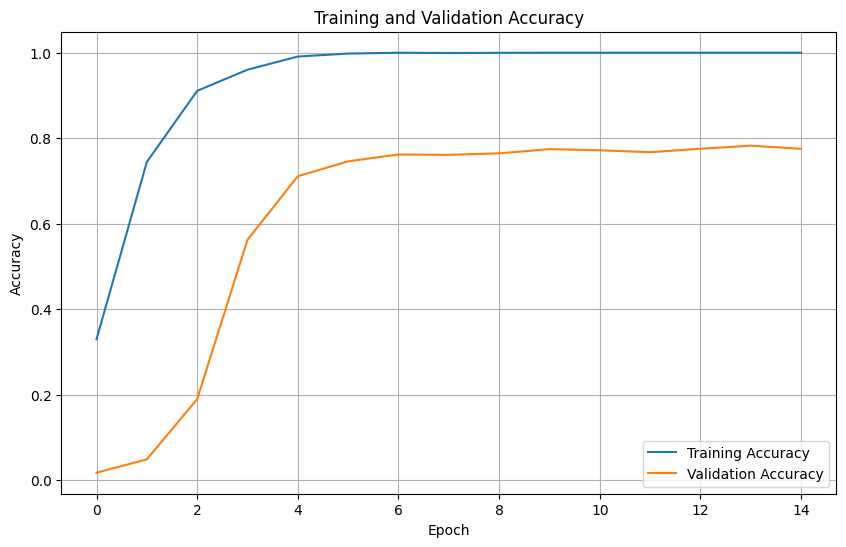

In [29]:
#Plot Training & Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

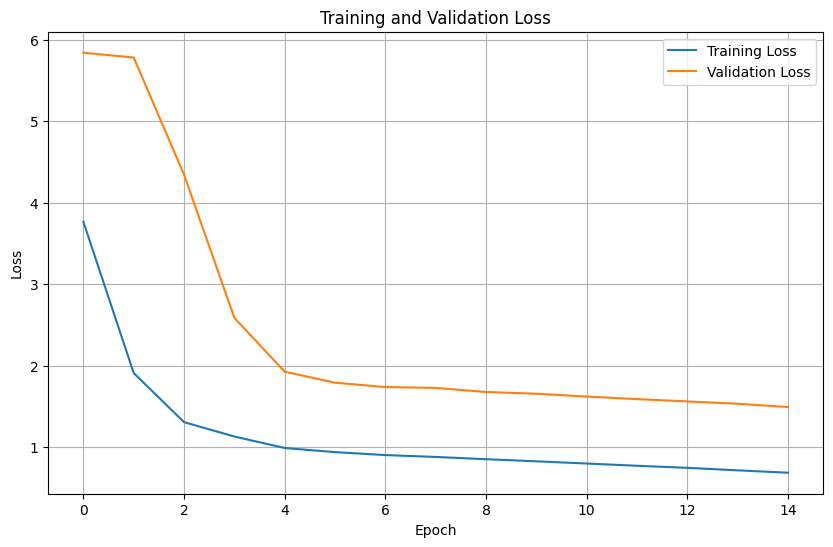

In [30]:
#Plot Training & Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Get predictions for test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [32]:
# Classification Report
print("\n--- Classification Report ---")
string_class_names = [str(cn) for cn in class_names]

print(classification_report(y_test, y_pred, target_names=string_class_names))


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.82      0.70      0.76        20
           2       0.95      0.90      0.92        20
           3       0.70      0.70      0.70        20
           4       1.00      0.90      0.95        20
           5       0.89      0.85      0.87        20
           6       0.94      0.85      0.89        20
           7       0.94      0.85      0.89        20
           8       0.75      0.60      0.67        20
           9       0.74      0.85      0.79        20
          10       0.89      0.85      0.87        20
          11       0.87      1.00      0.93        20
          12       0.86      0.90      0.88        20
          13       0.81      0.85      0.83        20
          14       0.76      0.80      0.78        20
          15       0.76      0.65      0.70        20
          16       0.89      0.80      0.84       

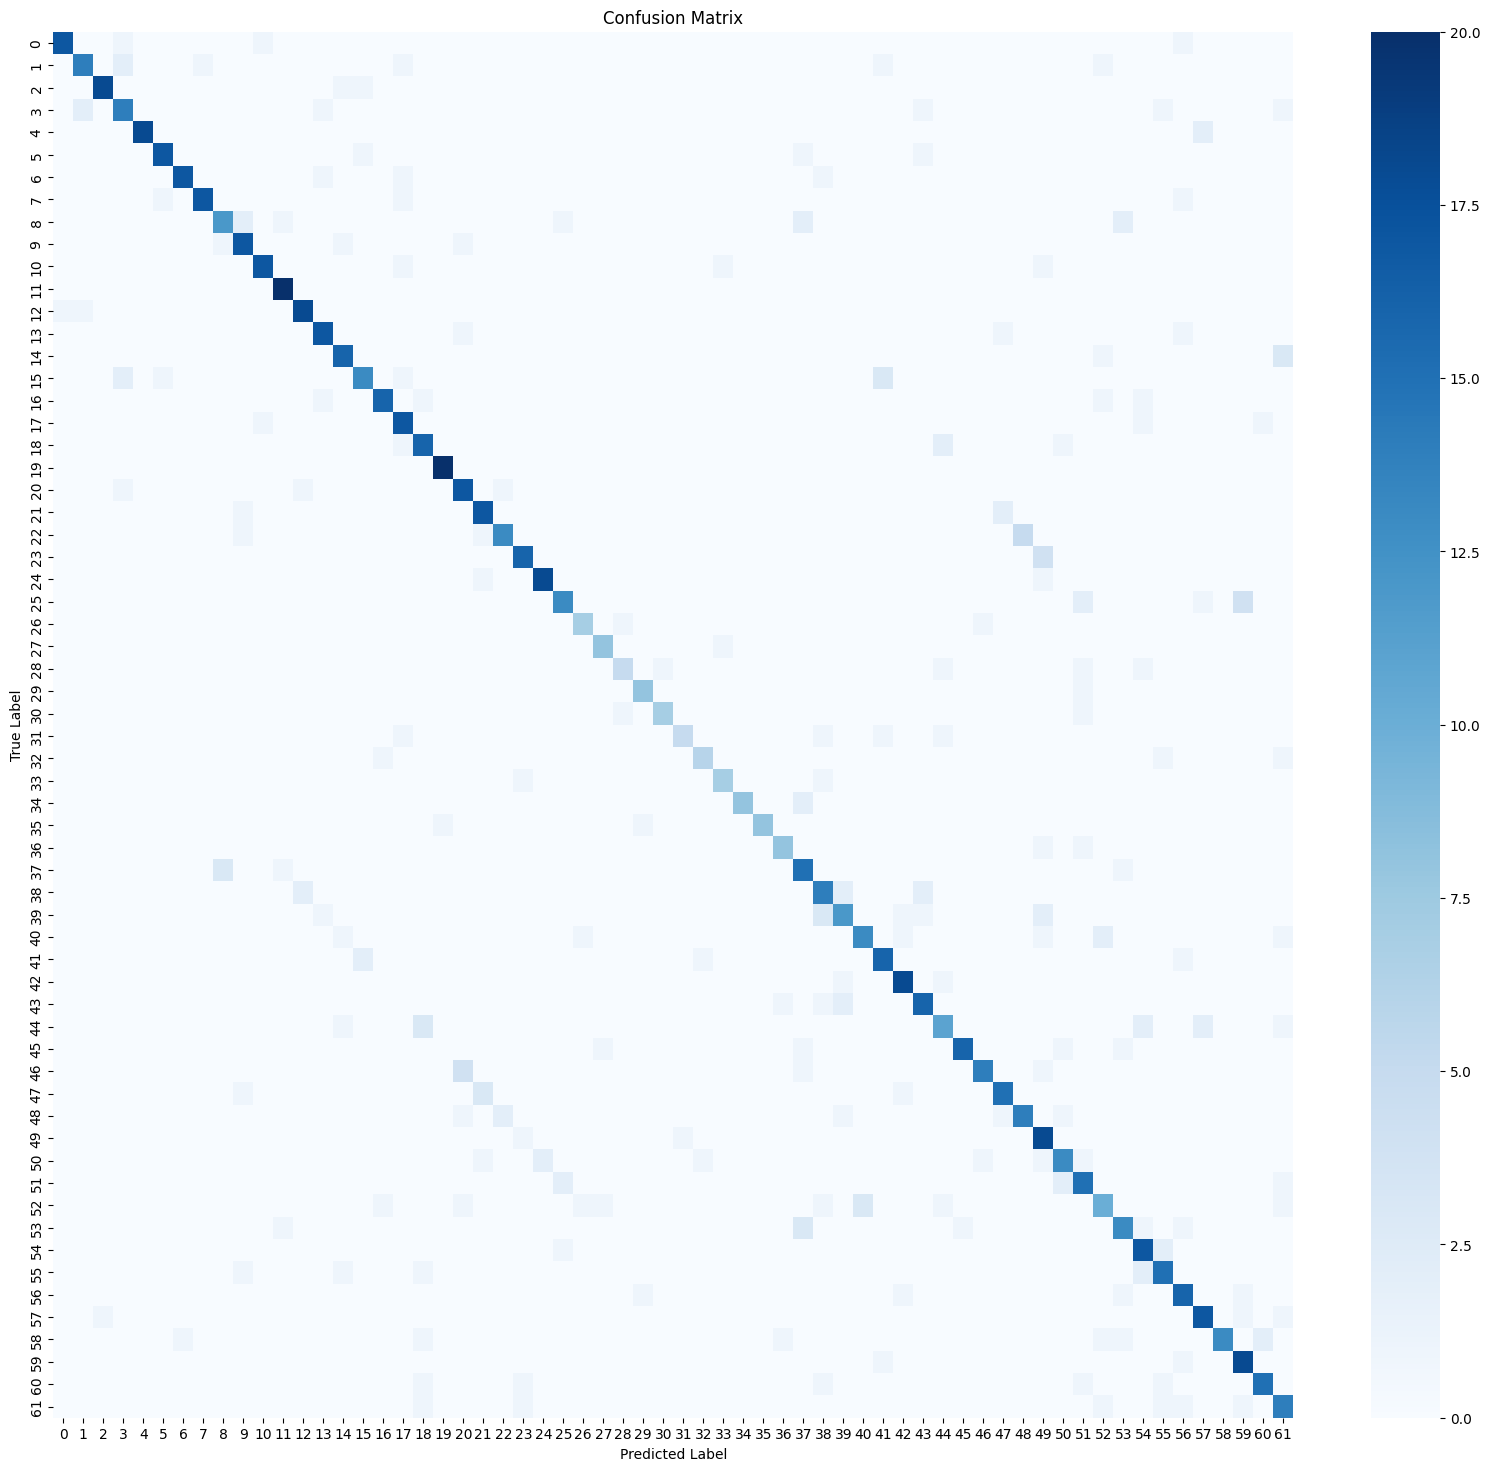

In [33]:
# Confusion Matrix (Heatmap)
# Note: For 62 classes, this heatmap will be very large and potentially unreadable.
# Consider using a smaller subset of classes or focusing on the classification report for detailed metrics.
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 18)) # Make figure very large to accommodate many classes
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

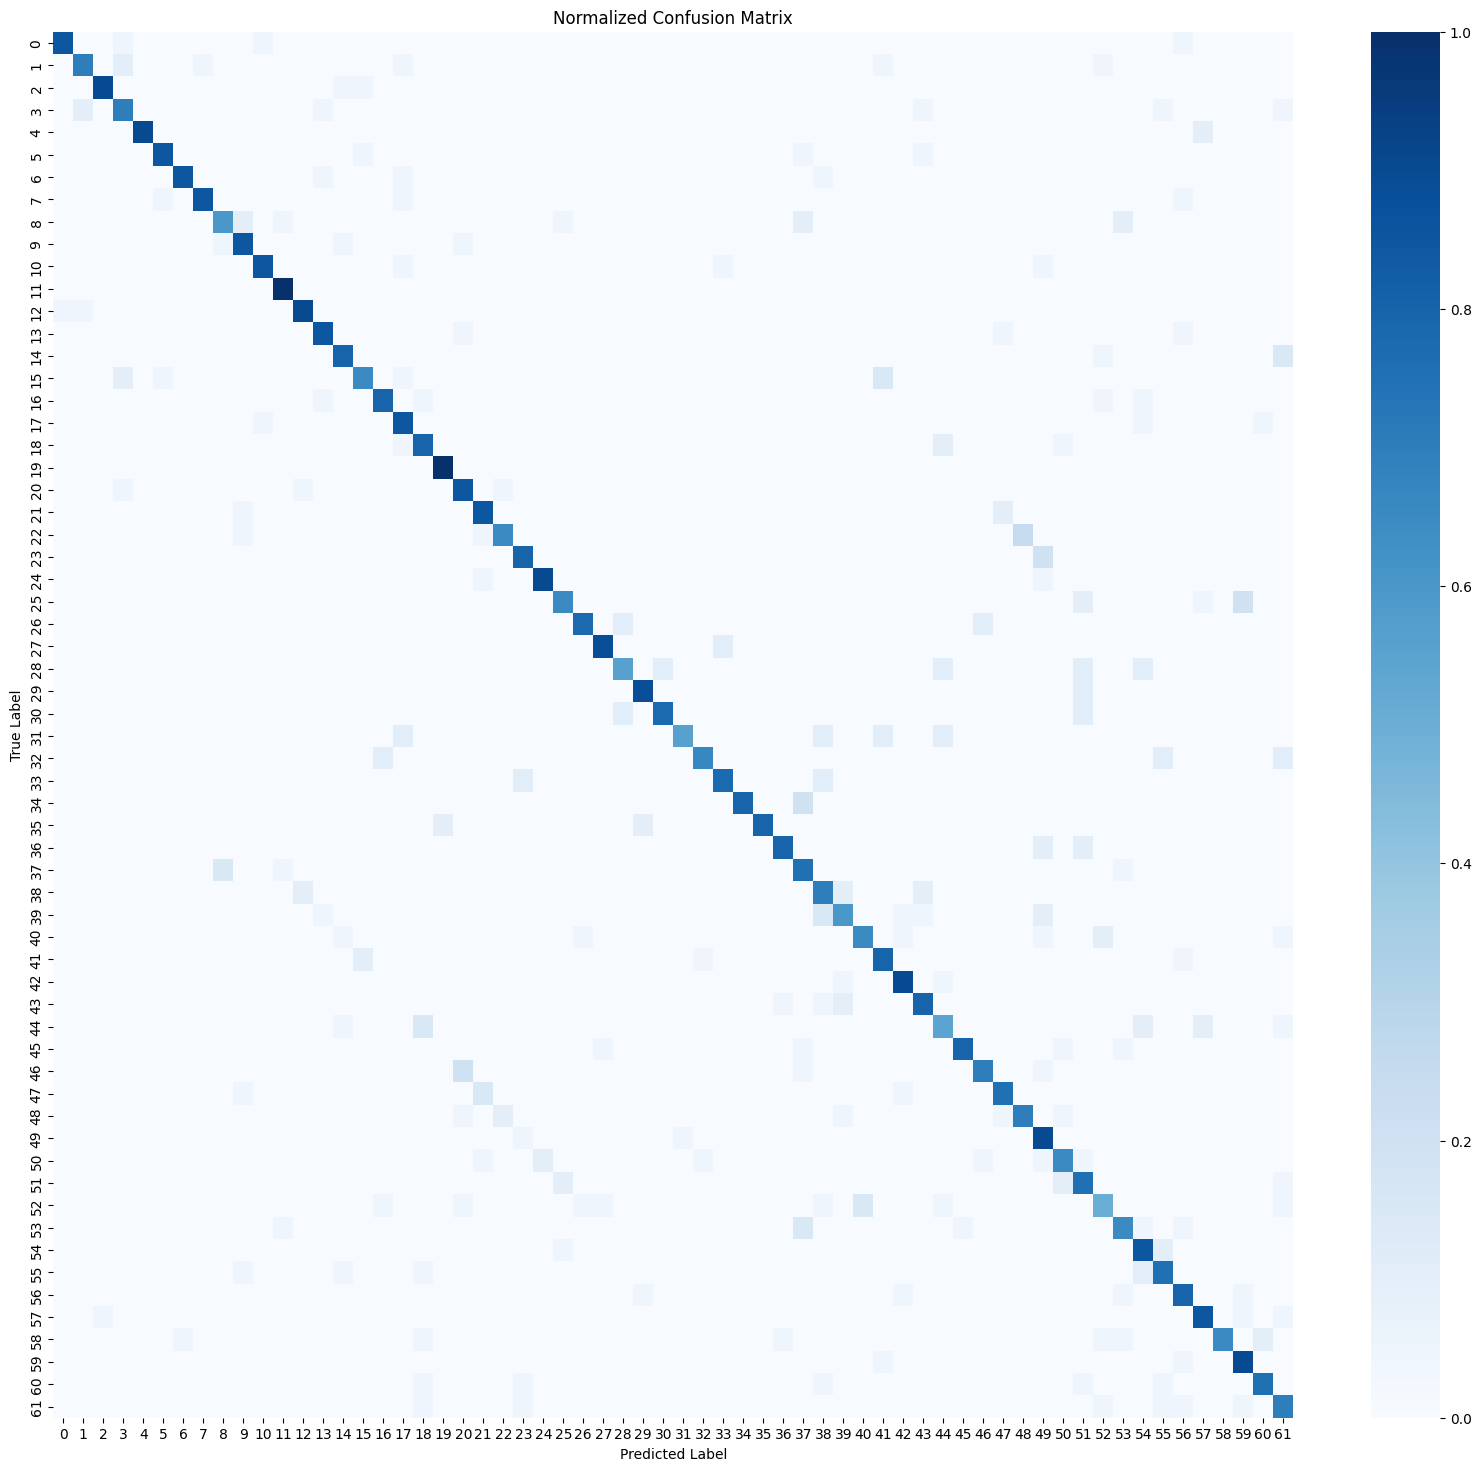

In [34]:
# Normalized Confusion Matrix (Heatmap)
# Also very large for 62 classes. Shows proportion of true labels predicted as each class.
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(20, 18)) # Make figure very large
sns.heatmap(cm_normalized, annot=False, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


--- Sample Correct Predictions ---


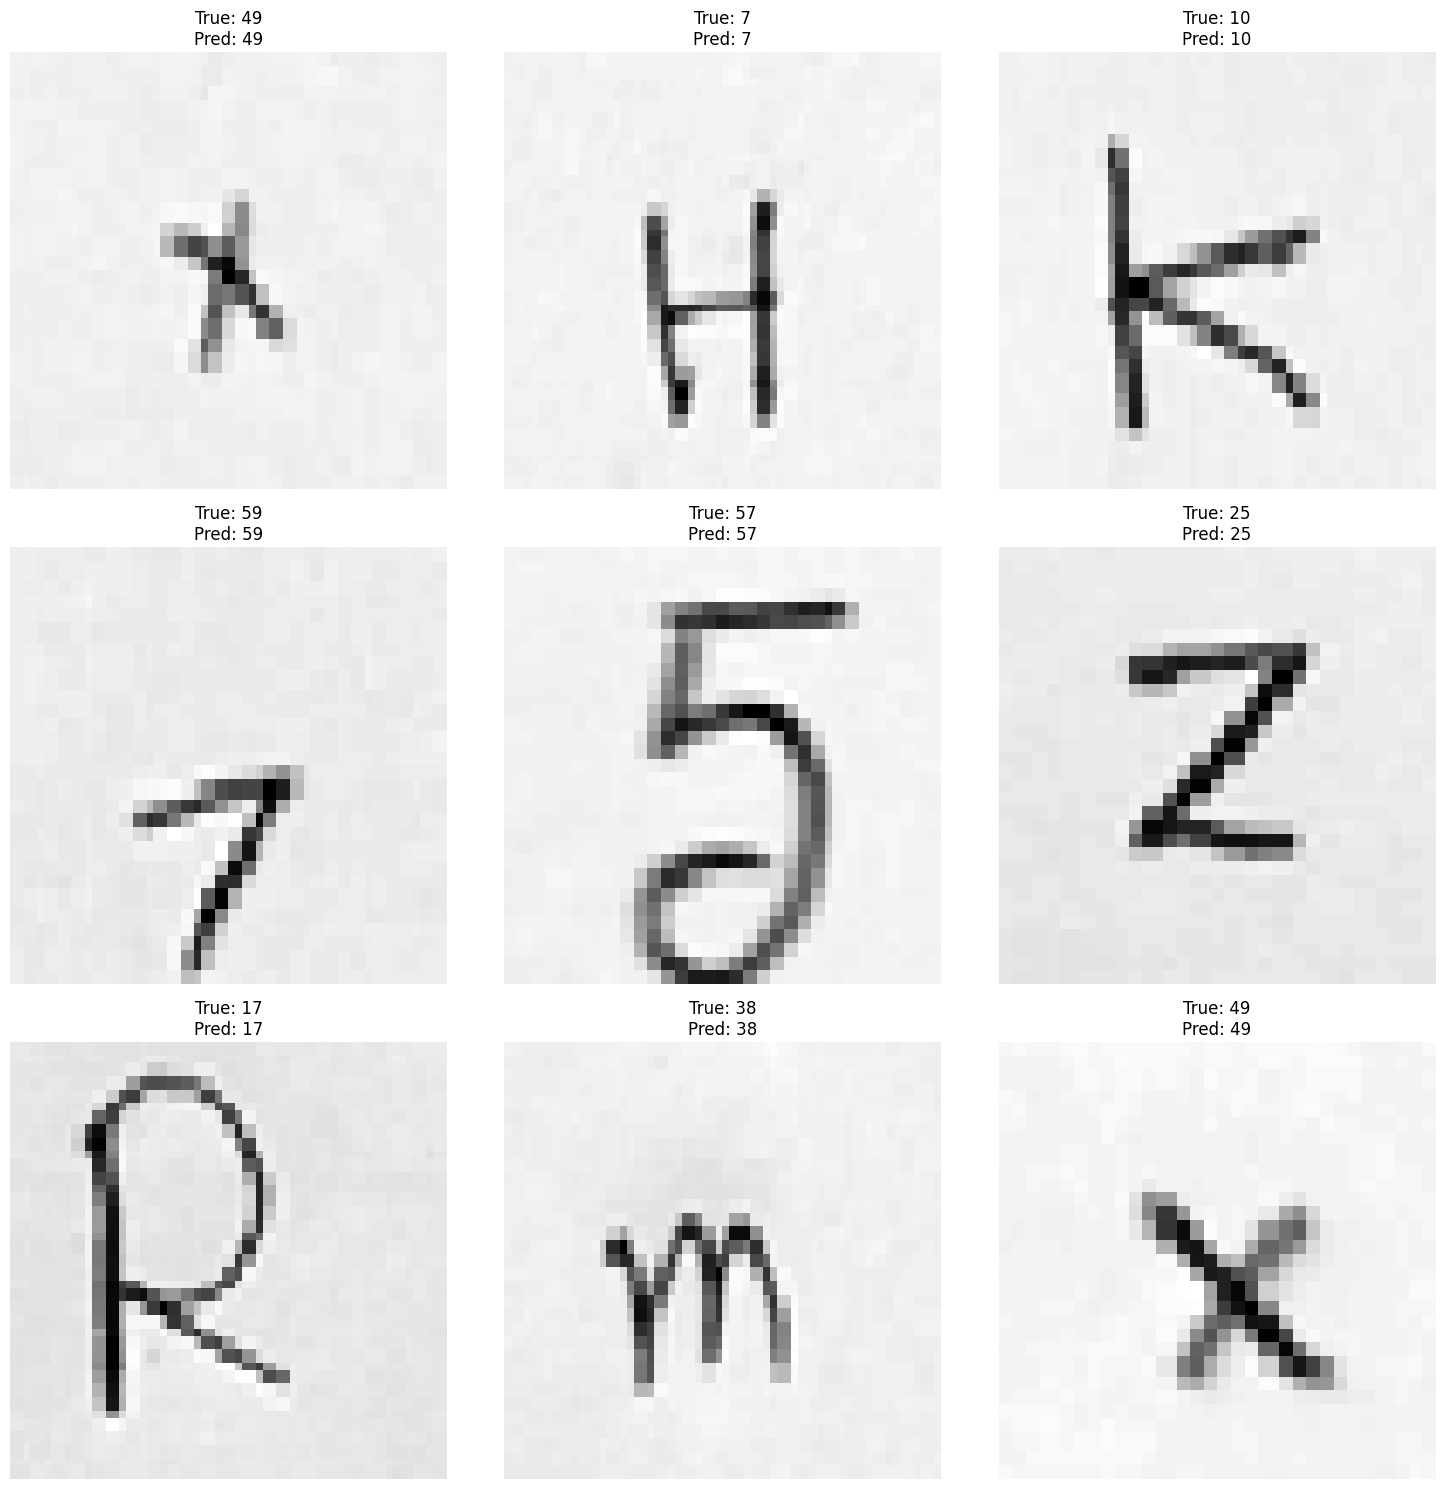

In [35]:
# Visualize Sample Correct Predictions
print("\n--- Sample Correct Predictions ---")
correct_indices = np.where(y_pred == y_test)[0]
np.random.shuffle(correct_indices)
plt.figure(figsize=(15, 15))
for i, correct in enumerate(correct_indices[:9]): # Display 9 correct predictions
    plt.subplot(3, 3, i + 1)
    # Assuming x_test images are 64x64 grayscale (shape 64,64,1)
    plt.imshow(x_test[correct].reshape(64, 64), cmap='gray')
    plt.title(f"True: {class_names[y_test[correct]]}\nPred: {class_names[y_pred[correct]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


--- Sample Incorrect Predictions ---


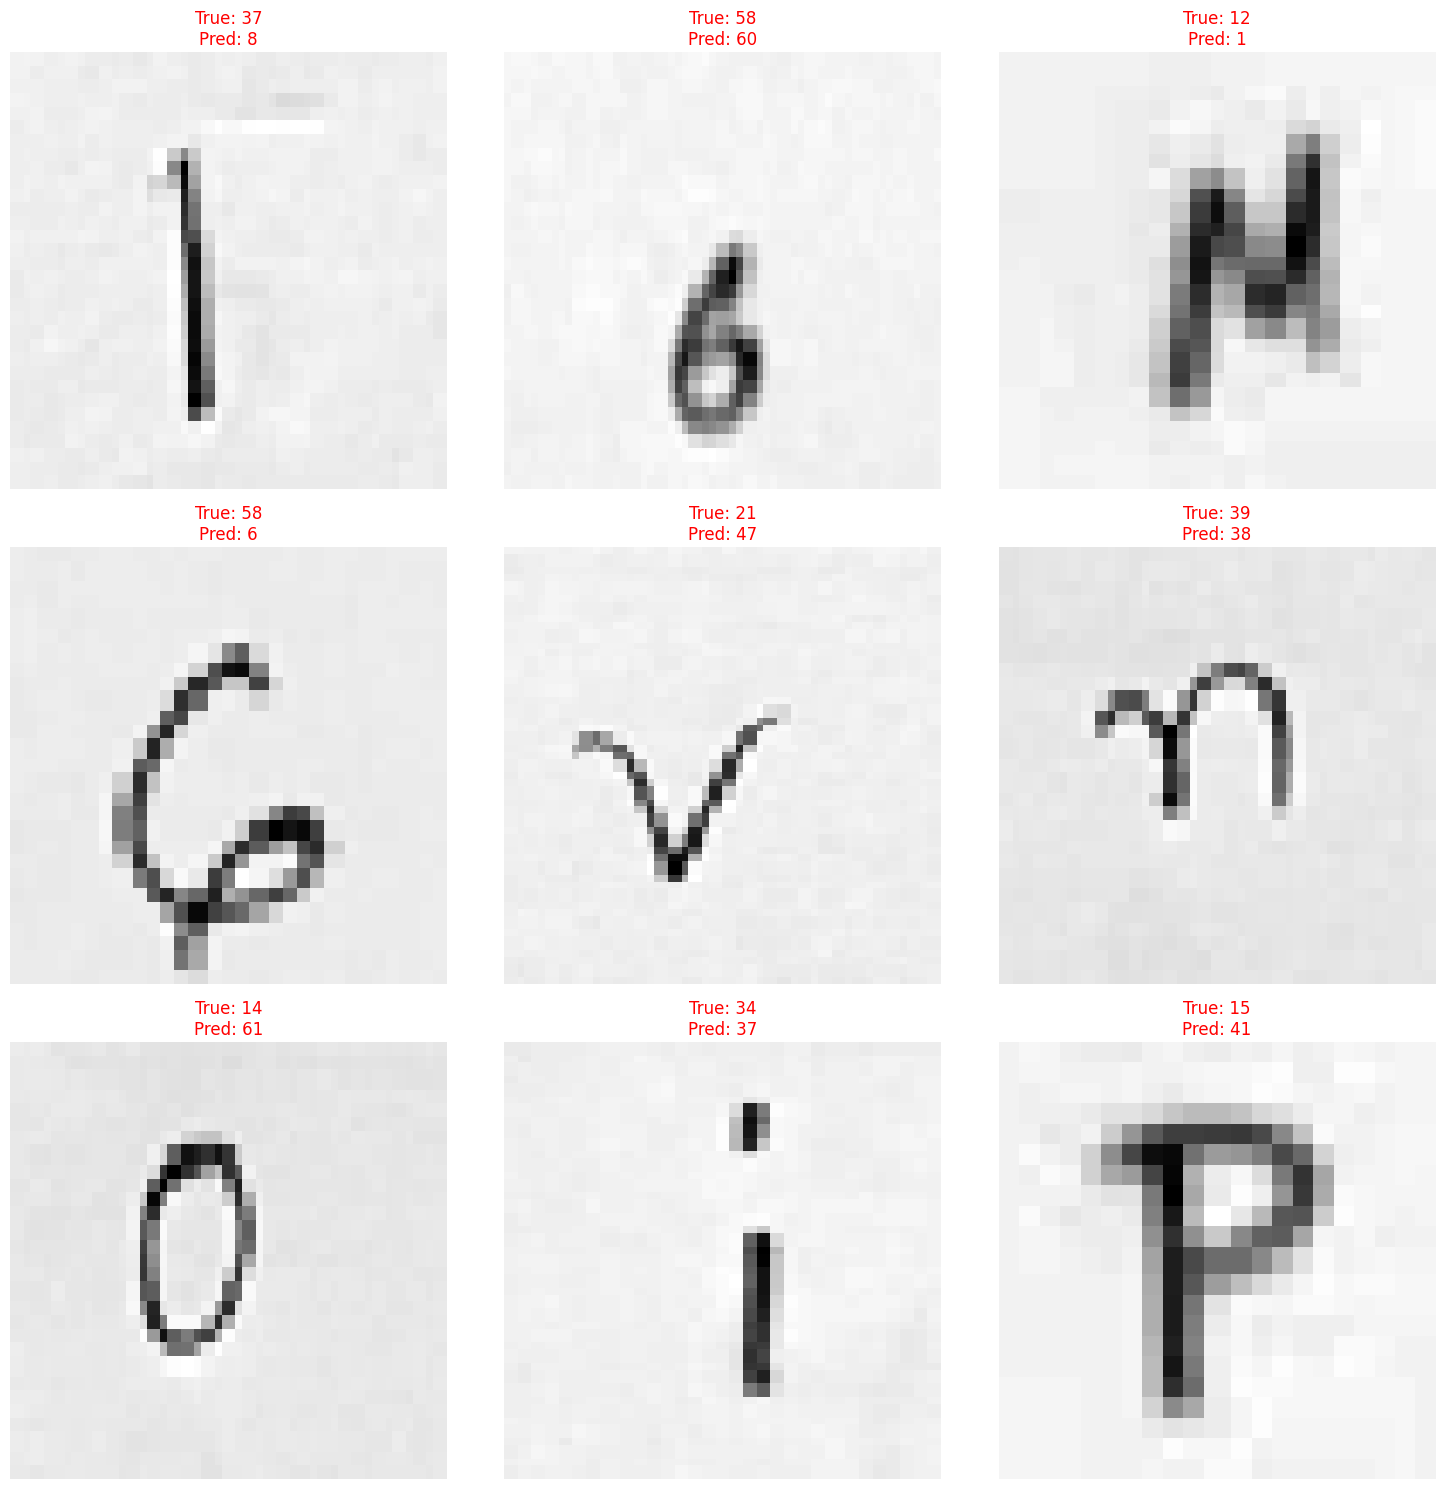

In [36]:
# Visualize Sample Incorrect Predictions
print("\n--- Sample Incorrect Predictions ---")
incorrect_indices = np.where(y_pred != y_test)[0]
np.random.shuffle(incorrect_indices)
plt.figure(figsize=(15, 15))
for i, incorrect in enumerate(incorrect_indices[:9]): # Display 9 incorrect predictions
    plt.subplot(3, 3, i + 1)
    # Assuming x_test images are 64x64 grayscale (shape 64,64,1)
    plt.imshow(x_test[incorrect].reshape(64, 64), cmap='gray')
    plt.title(f"True: {class_names[y_test[incorrect]]}\nPred: {class_names[y_pred[incorrect]]}", color='red')
    plt.axis('off')
plt.tight_layout()
plt.show()

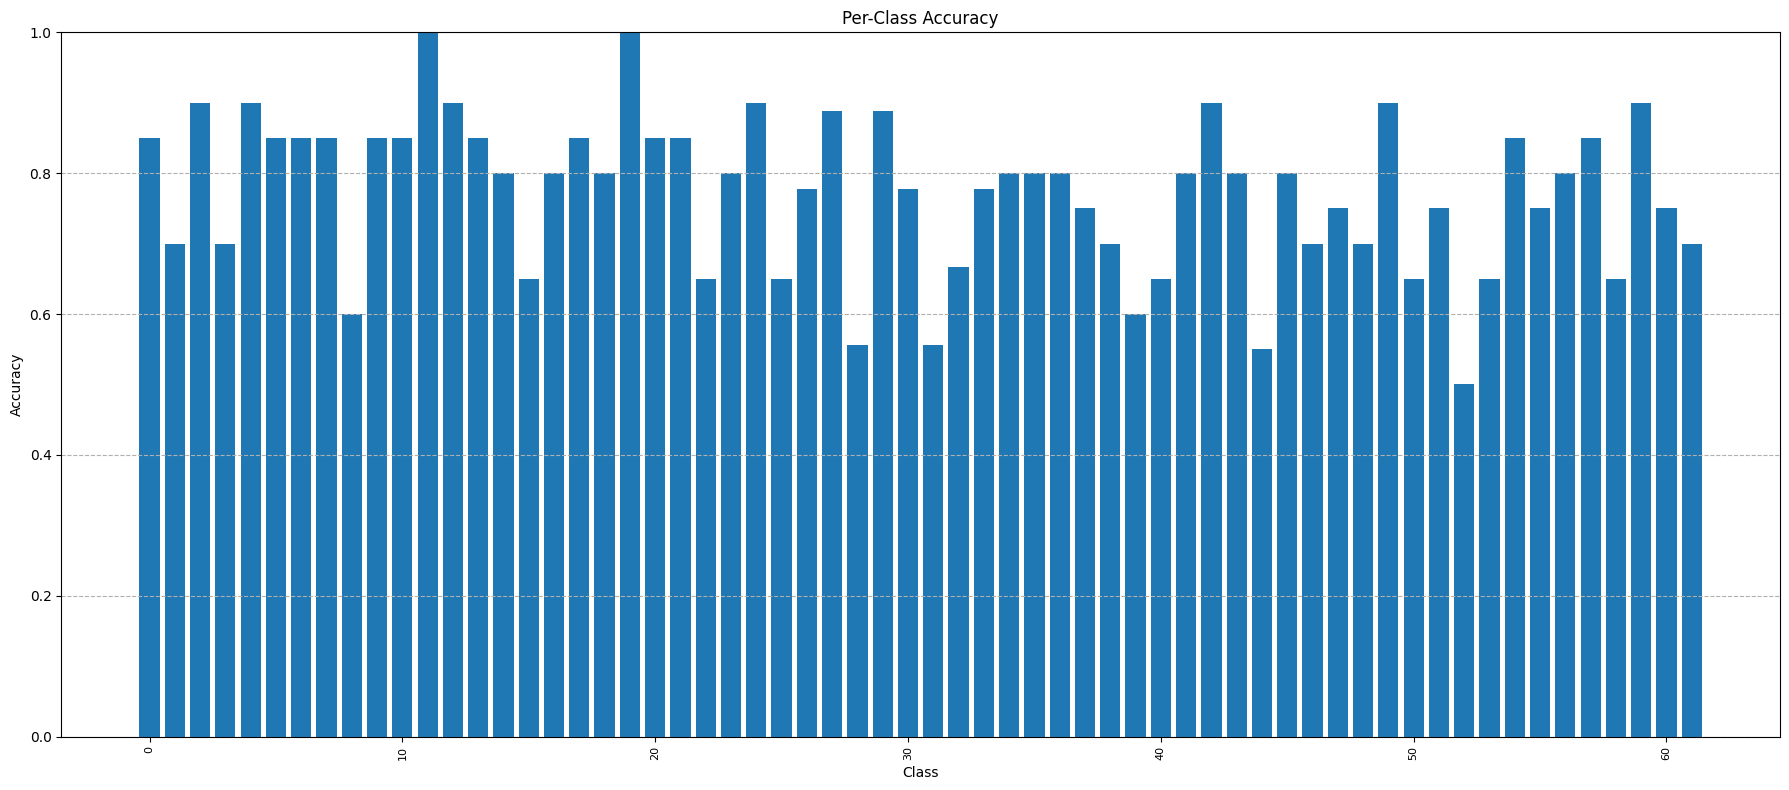

In [37]:
# Per-Class Accuracy Bar Chart
class_accuracies = []
for i in range(len(class_names)):
    class_mask = (y_test == i)
    correct_predictions_in_class = np.sum((y_pred[class_mask] == y_test[class_mask]))
    total_in_class = np.sum(class_mask)
    if total_in_class > 0:
        class_accuracies.append(correct_predictions_in_class / total_in_class)
    else:
        class_accuracies.append(0) # No samples for this class in test set

plt.figure(figsize=(18, 8))
plt.bar(class_names, class_accuracies)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.xticks(rotation=90, fontsize=8)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [38]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
if 'model' in locals() and hasattr(model, 'predict'):
    y_pred_proba = model.predict(x_test)
else:
    print("Warning: 'model' object not found or does not have 'predict' method. Generating dummy probabilities.")
    # Fallback: create dummy probabilities if model is not available
    num_classes = len(class_names)
    num_samples = len(y_test)
    y_pred_proba = np.zeros((num_samples, num_classes))
    for i in range(num_samples):
        y_pred_proba[i, y_pred[i]] = 1.0 # Assign 100% to predicted class
        # Add some noise to make it look like probabilities
        noise = np.random.rand(num_classes) * 0.1
        y_pred_proba[i] = y_pred_proba[i] + noise
        y_pred_proba[i] = y_pred_proba[i] / np.sum(y_pred_proba[i])

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step



 Confusion Matrix (Raw Counts) ---


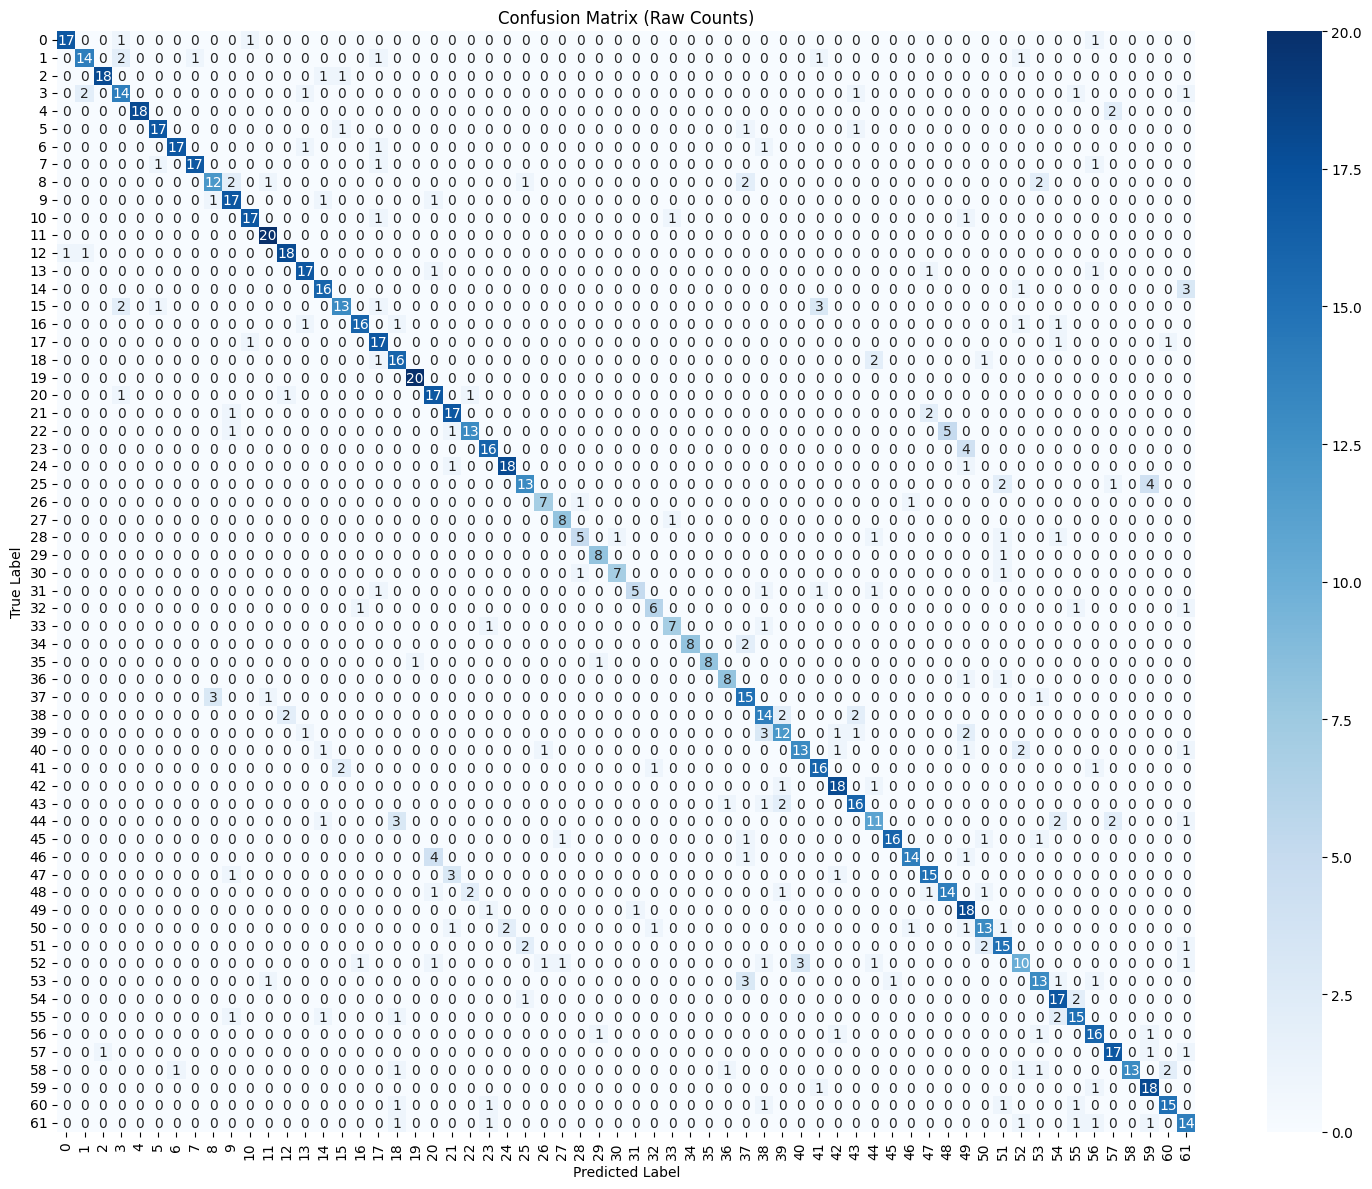

In [39]:
# Confusion Matrix (Raw Counts)
print("\n Confusion Matrix (Raw Counts) ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Raw Counts)')
plt.tight_layout()
plt.show()


 Normalized Confusion Matrix (Proportions) ---


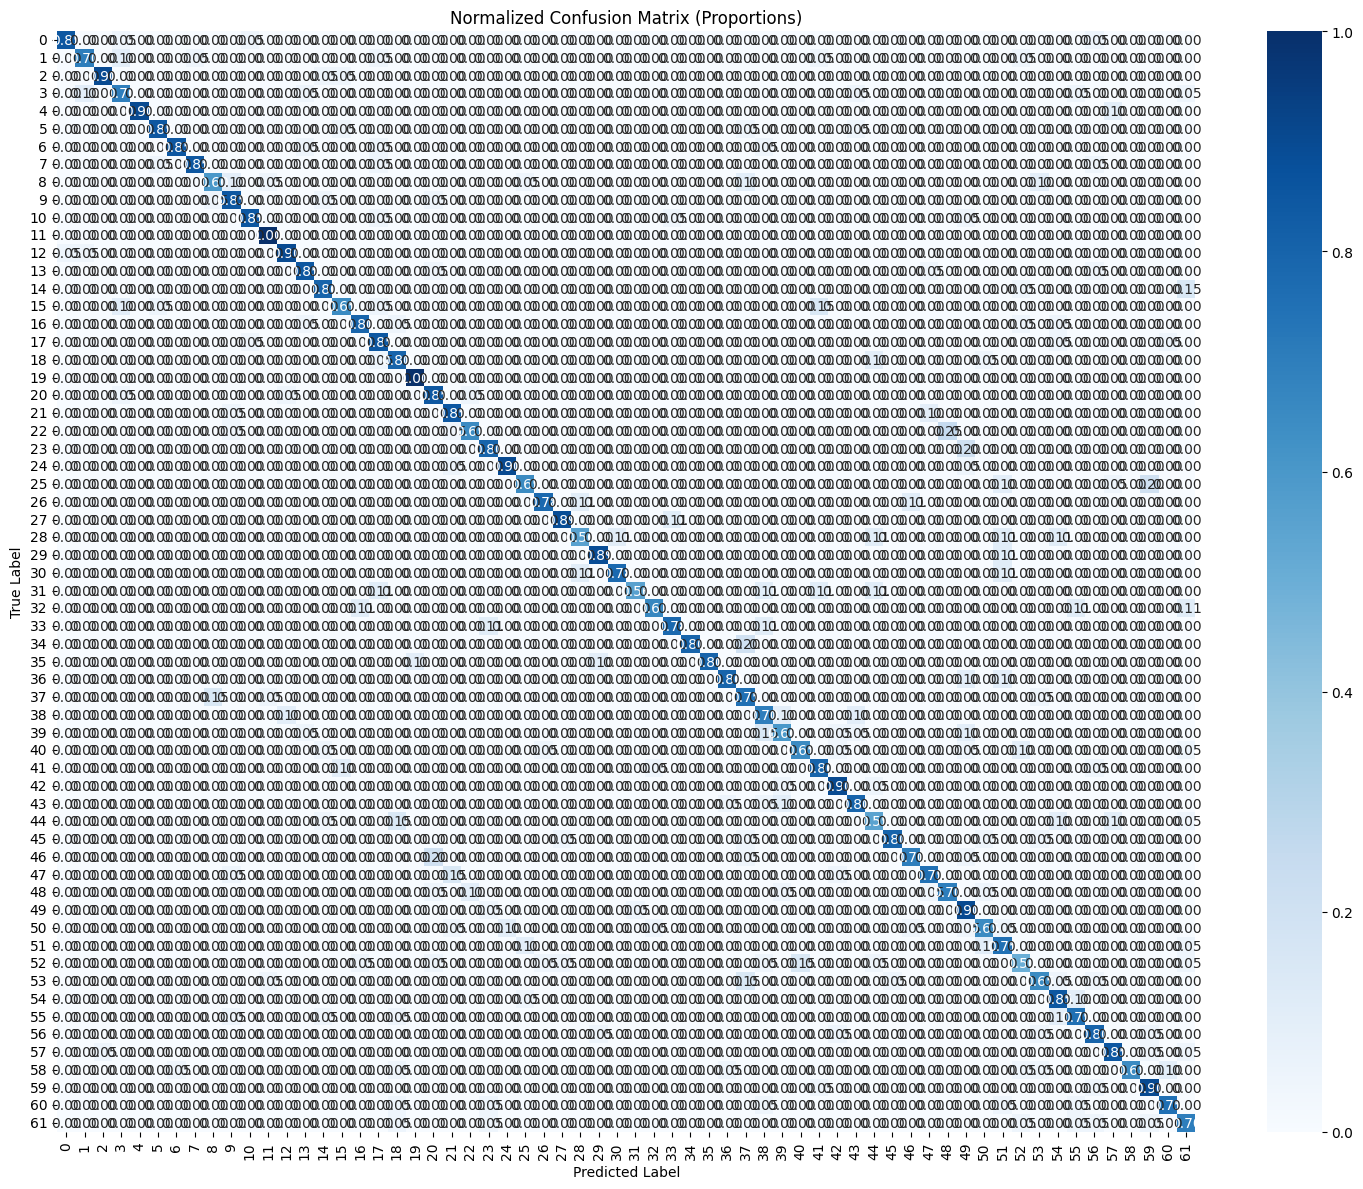

In [40]:
#  Normalized Confusion Matrix (Proportions)
print("\n Normalized Confusion Matrix (Proportions) ---")
# Handle potential division by zero if a class has no true samples
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalized[np.isnan(cm_normalized)] = 0 # Replace NaN with 0 for classes with no true samples

plt.figure(figsize=(15, 12))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix (Proportions)')
plt.tight_layout()
plt.show()


 Classification Report Metrics ---


<Figure size 1800x800 with 0 Axes>

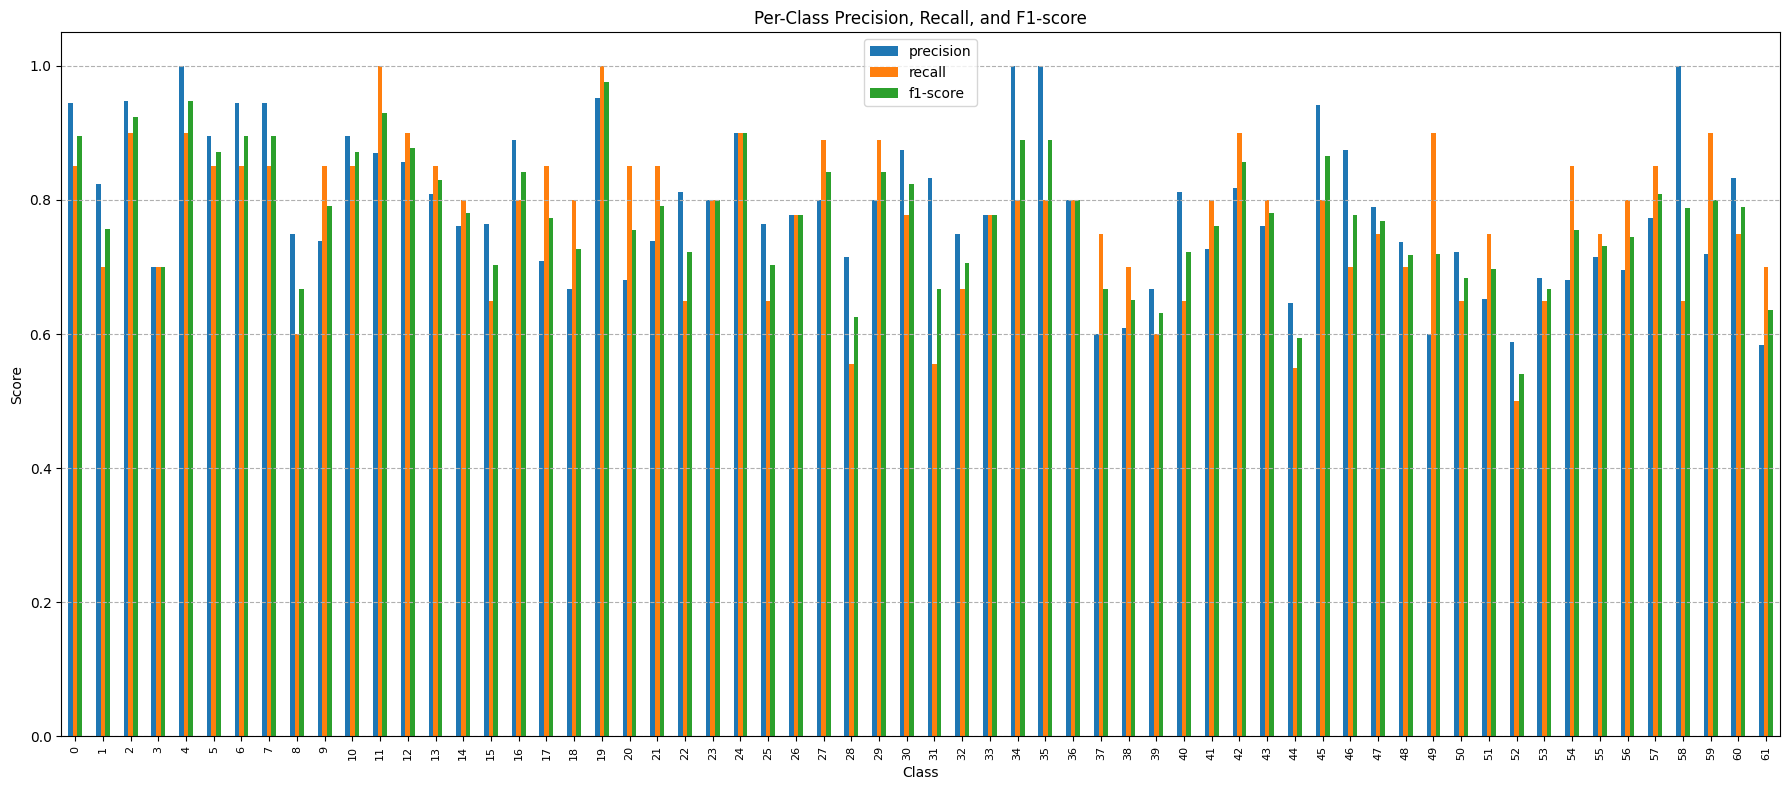

In [41]:
#  Classification Report Metrics (Precision, Recall, F1-score) Bar Chart
print("\n Classification Report Metrics ---")
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True, zero_division=0)
metrics_df = pd.DataFrame(report).transpose()
metrics_df = metrics_df.drop(columns=['support'])
metrics_df = metrics_df.drop(index=['accuracy', 'macro avg', 'weighted avg'], errors='ignore') # 'errors=ignore' handles cases where 'accuracy' might not be a direct index if no samples

plt.figure(figsize=(18, 8))
metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(18, 8))
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Per-Class Precision, Recall, and F1-score')
plt.xticks(rotation=90, fontsize=8)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


 Distribution of Maximum Prediction Probabilities ---


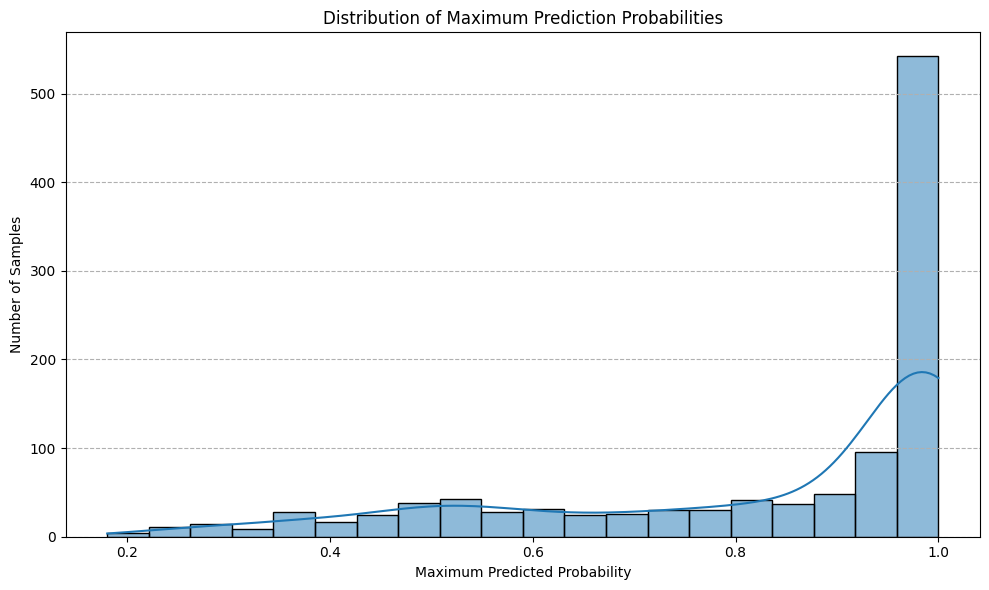

In [42]:
# Distribution of Maximum Prediction Probabilities (Overall)
print("\n Distribution of Maximum Prediction Probabilities ---")
max_probs = np.max(y_pred_proba, axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(max_probs, bins=20, kde=True)
plt.xlabel('Maximum Predicted Probability')
plt.ylabel('Number of Samples')
plt.title('Distribution of Maximum Prediction Probabilities')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


 Distribution of Max Prediction Probabilities (Correct vs. Incorrect) ---


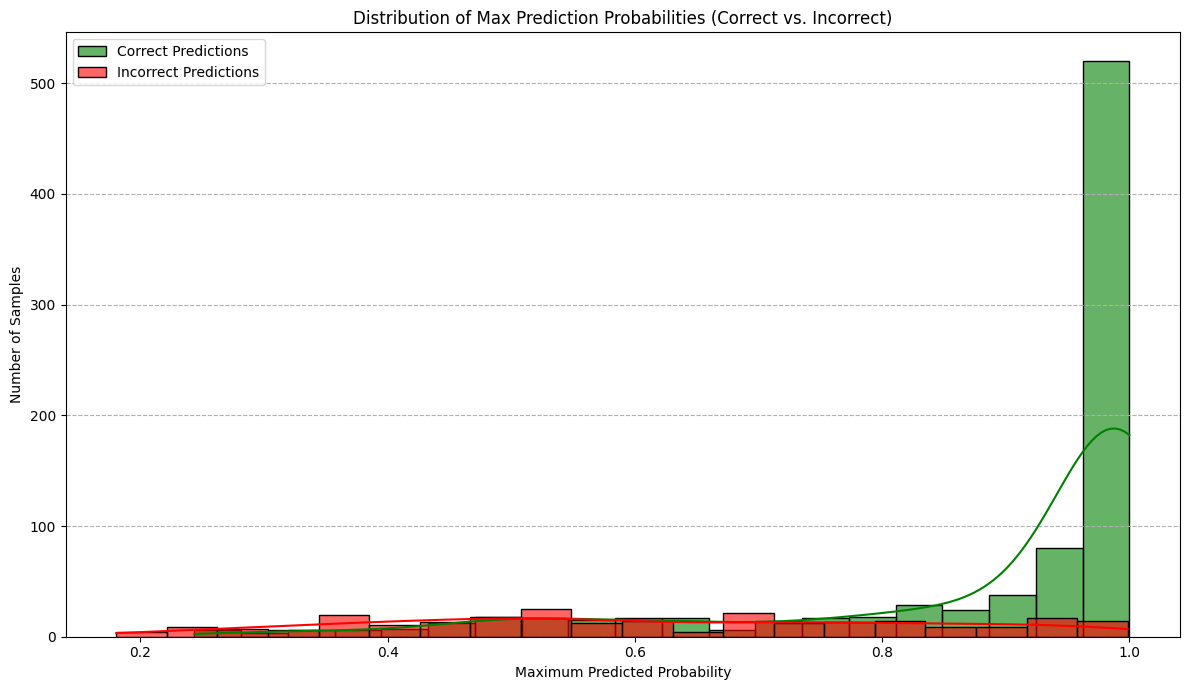

In [43]:
# Distribution of Maximum Prediction Probabilities (Correct vs. Incorrect)
print("\n Distribution of Max Prediction Probabilities (Correct vs. Incorrect) ---")
correct_mask = (y_pred == y_test)
incorrect_mask = ~correct_mask

plt.figure(figsize=(12, 7))
sns.histplot(max_probs[correct_mask], bins=20, kde=True, color='green', label='Correct Predictions', alpha=0.6)
sns.histplot(max_probs[incorrect_mask], bins=20, kde=True, color='red', label='Incorrect Predictions', alpha=0.6)
plt.xlabel('Maximum Predicted Probability')
plt.ylabel('Number of Samples')
plt.title('Distribution of Max Prediction Probabilities (Correct vs. Incorrect)')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


 Sample Images with Top 3 Predictions ---


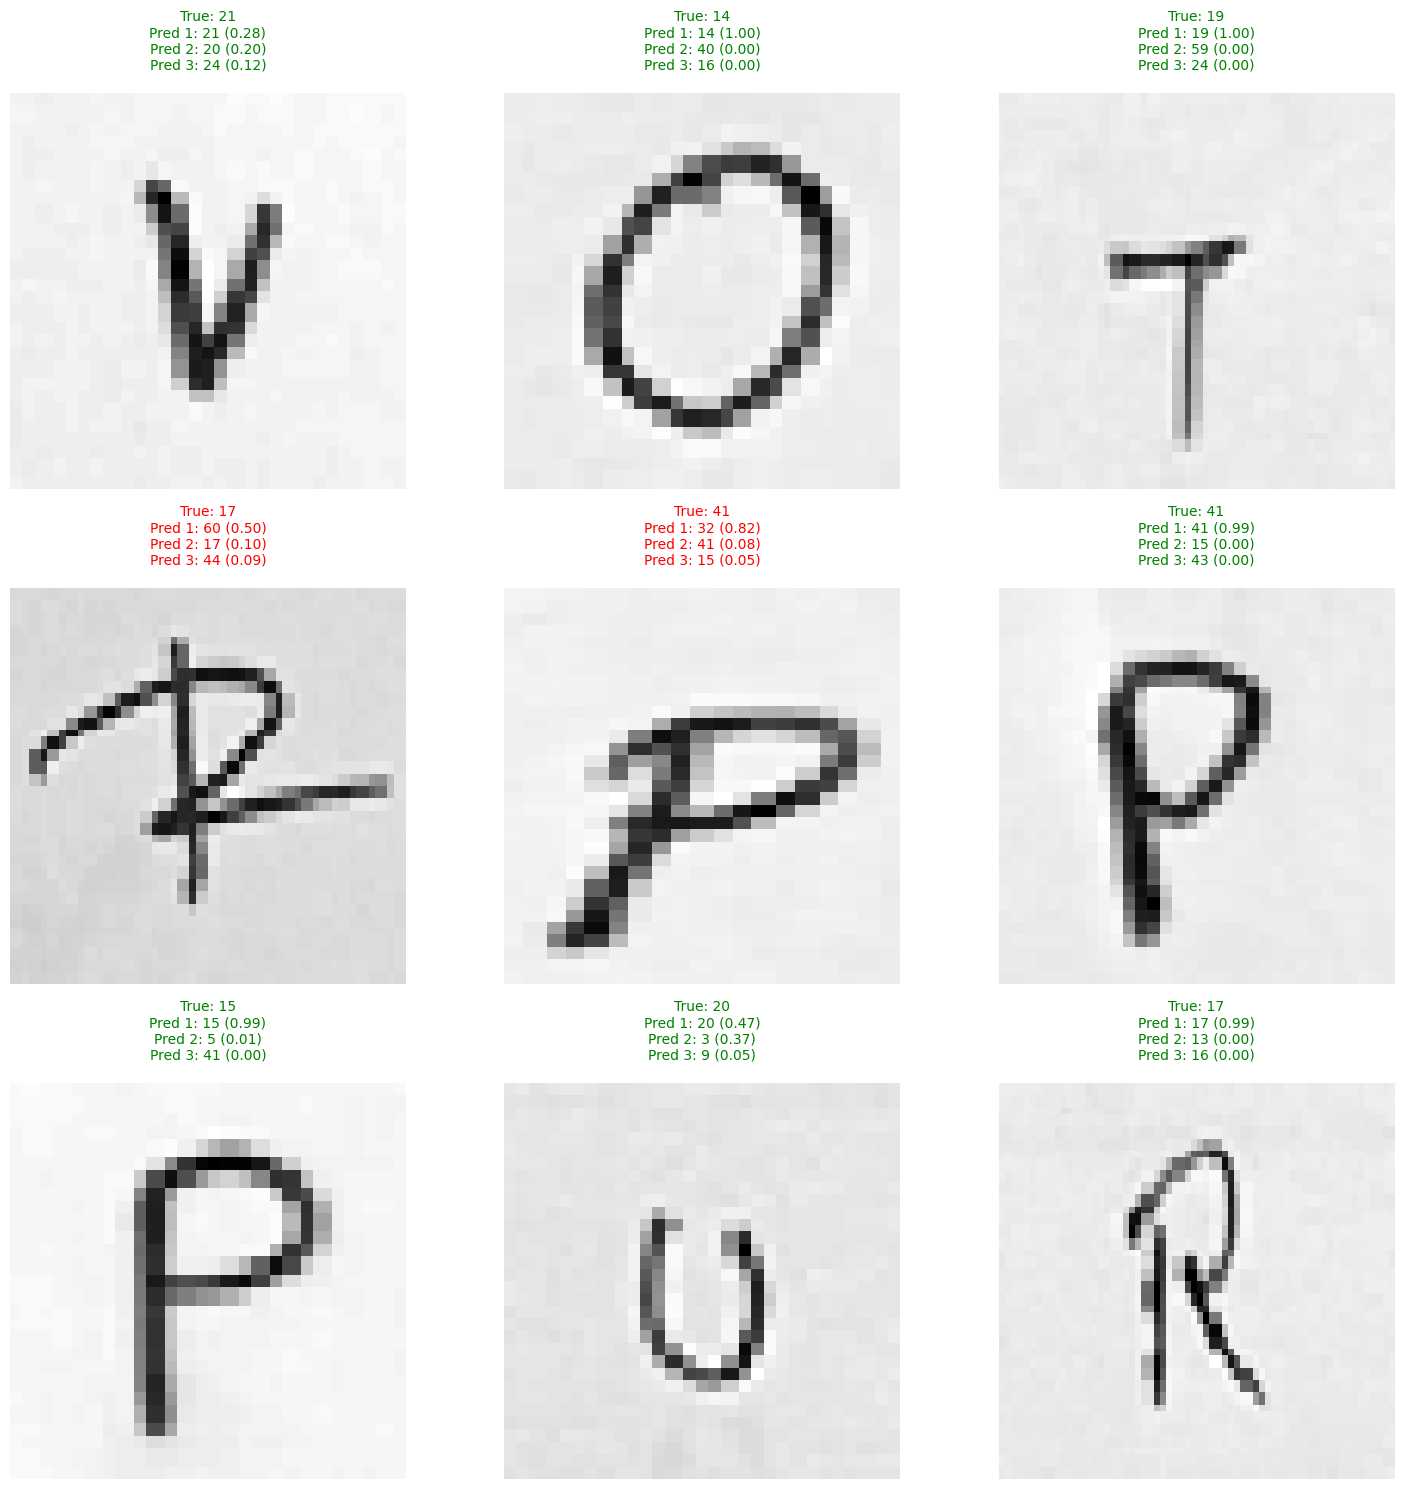

In [44]:
# Sample Images with Top 3 Predicted Classes and Probabilities
print("\n Sample Images with Top 3 Predictions ---")
# Ensure there are enough samples to pick from
num_samples_to_display = min(9, len(x_test))
if num_samples_to_display > 0:
    sample_indices = np.random.choice(len(x_test), num_samples_to_display, replace=False)
    plt.figure(figsize=(15, 15))
    for i, idx in enumerate(sample_indices):
        plt.subplot(3, 3, i + 1)
        # Assuming x_test images are 64x64 grayscale (shape 64,64,1)
        plt.imshow(x_test[idx].reshape(64, 64), cmap='gray')
        true_label = class_names[y_test[idx]]
        
        # Get top 3 predictions
        top_3_indices = np.argsort(y_pred_proba[idx])[-3:][::-1]
        top_3_probs = y_pred_proba[idx][top_3_indices]
        
        title_str = f"True: {true_label}\n"
        for j in range(min(3, len(top_3_indices))): # Ensure we don't go out of bounds if less than 3 classes
            pred_label = class_names[top_3_indices[j]]
            prob = top_3_probs[j]
            title_str += f"Pred {j+1}: {pred_label} ({prob:.2f})\n"
        
        plt.title(title_str, color='green' if y_pred[idx] == y_test[idx] else 'red', fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough samples in x_test to display sample images.")



---  Class Distribution in Test Set ---


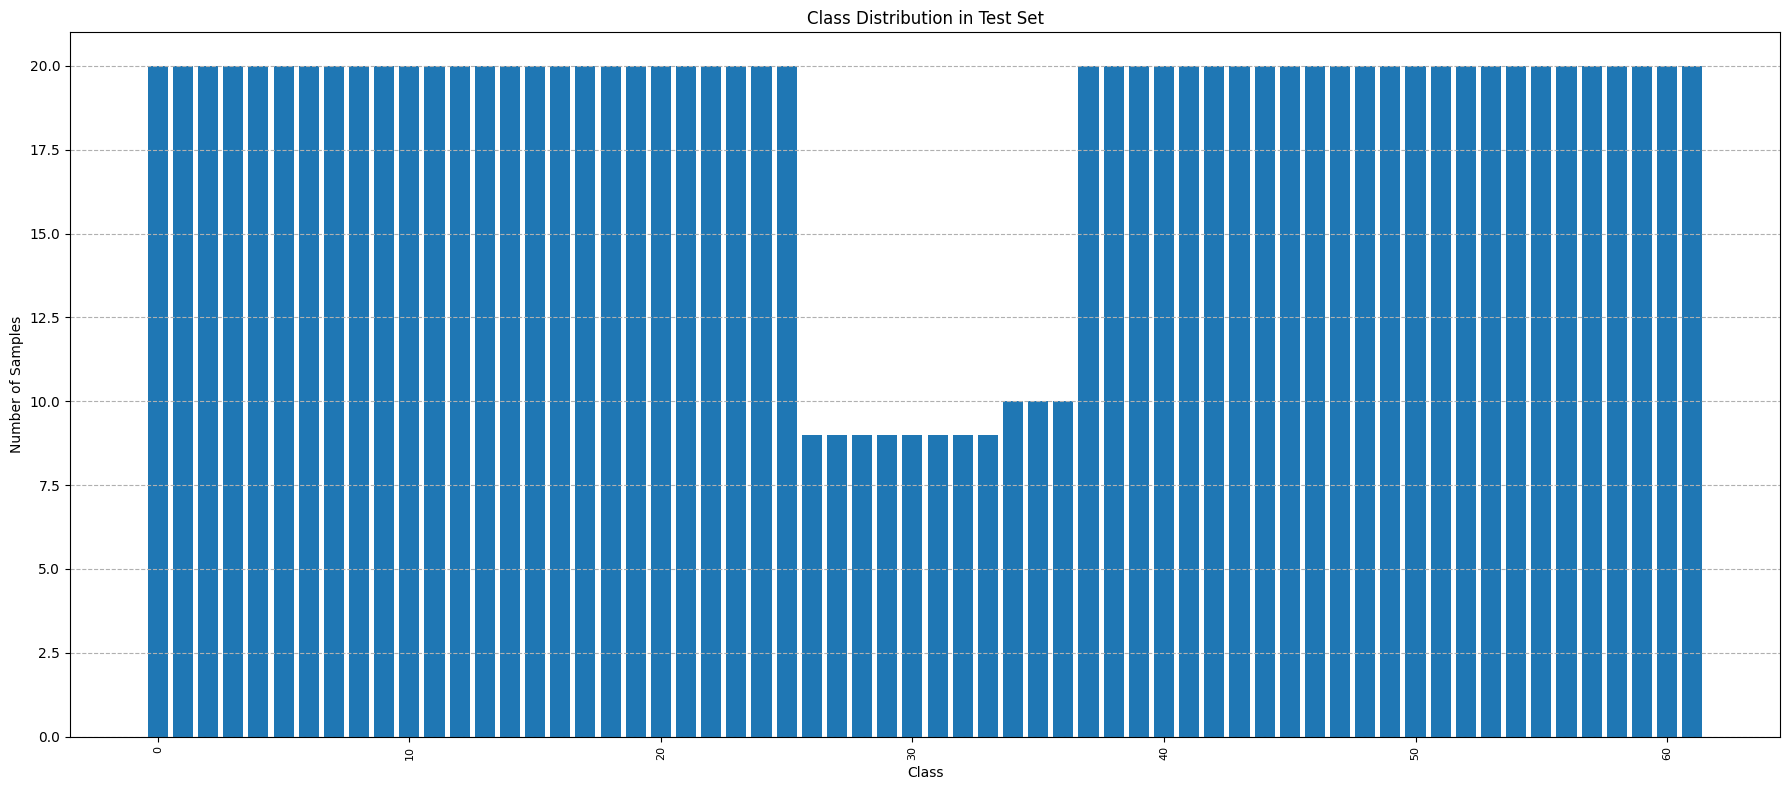

In [45]:
# Class Distribution in Test Set
print("\n---  Class Distribution in Test Set ---")
unique_classes, class_counts = np.unique(y_test, return_counts=True)
# Create a full list of counts for all classes, filling 0 for missing ones
full_class_counts = np.zeros(len(class_names), dtype=int)
for i, count in zip(unique_classes, class_counts):
    full_class_counts[i] = count

plt.figure(figsize=(18, 8))
plt.bar(class_names, full_class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Test Set')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


 Top N Most Confused Class Pairs ---


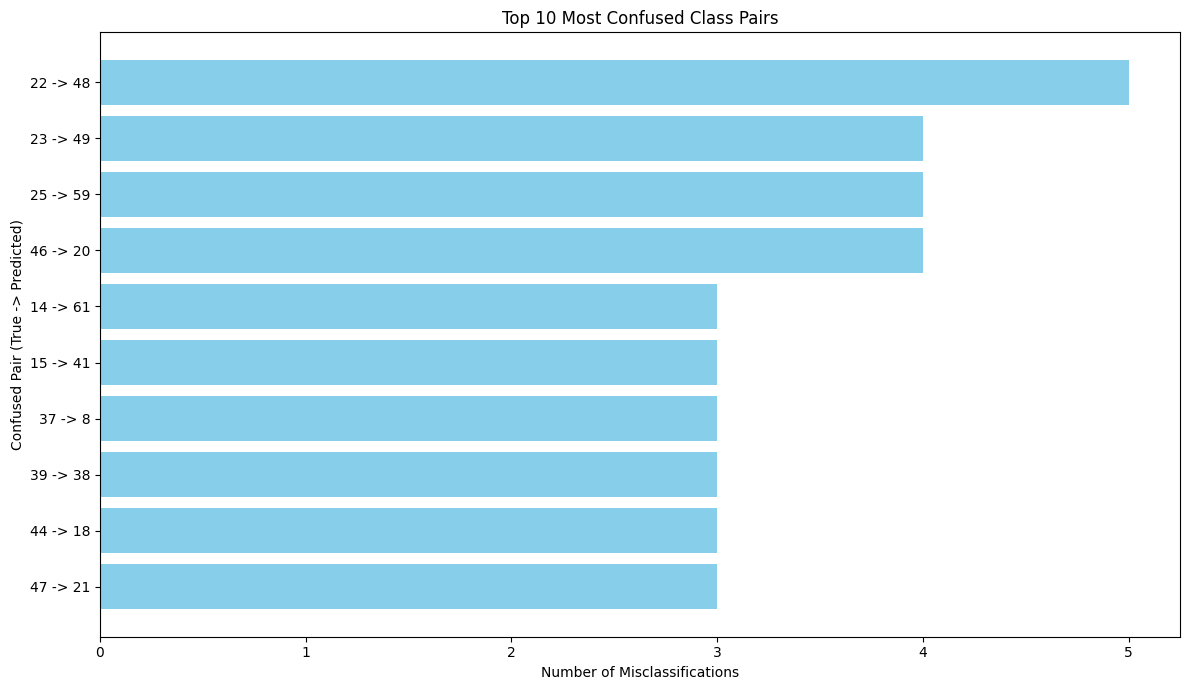

In [46]:
# Top N Most Confused Class Pairs
print("\n Top N Most Confused Class Pairs ---")
# Create a matrix of misclassifications (off-diagonal elements of confusion matrix)
misclassification_matrix = cm - np.diag(np.diag(cm))
confused_pairs = []
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j and misclassification_matrix[i, j] > 0:
            confused_pairs.append(((class_names[i], class_names[j]), misclassification_matrix[i, j]))

confused_pairs.sort(key=lambda x: x[1], reverse=True)

num_top_pairs = min(10, len(confused_pairs)) # Display top 10 or fewer if less exist
if num_top_pairs > 0:
    labels = [f"{pair[0]} -> {pair[1]}" for pair, count in confused_pairs[:num_top_pairs]]
    counts = [count for pair, count in confused_pairs[:num_top_pairs]]

    plt.figure(figsize=(12, 7))
    plt.barh(labels[::-1], counts[::-1], color='skyblue') # Reverse for highest at top
    plt.xlabel('Number of Misclassifications')
    plt.ylabel('Confused Pair (True -> Predicted)')
    plt.title(f'Top {num_top_pairs} Most Confused Class Pairs')
    plt.tight_layout()
    plt.show()
else:
    print("No significant misclassifications found to analyze confused pairs.")



 Error Rate per Class (Sorted) ---


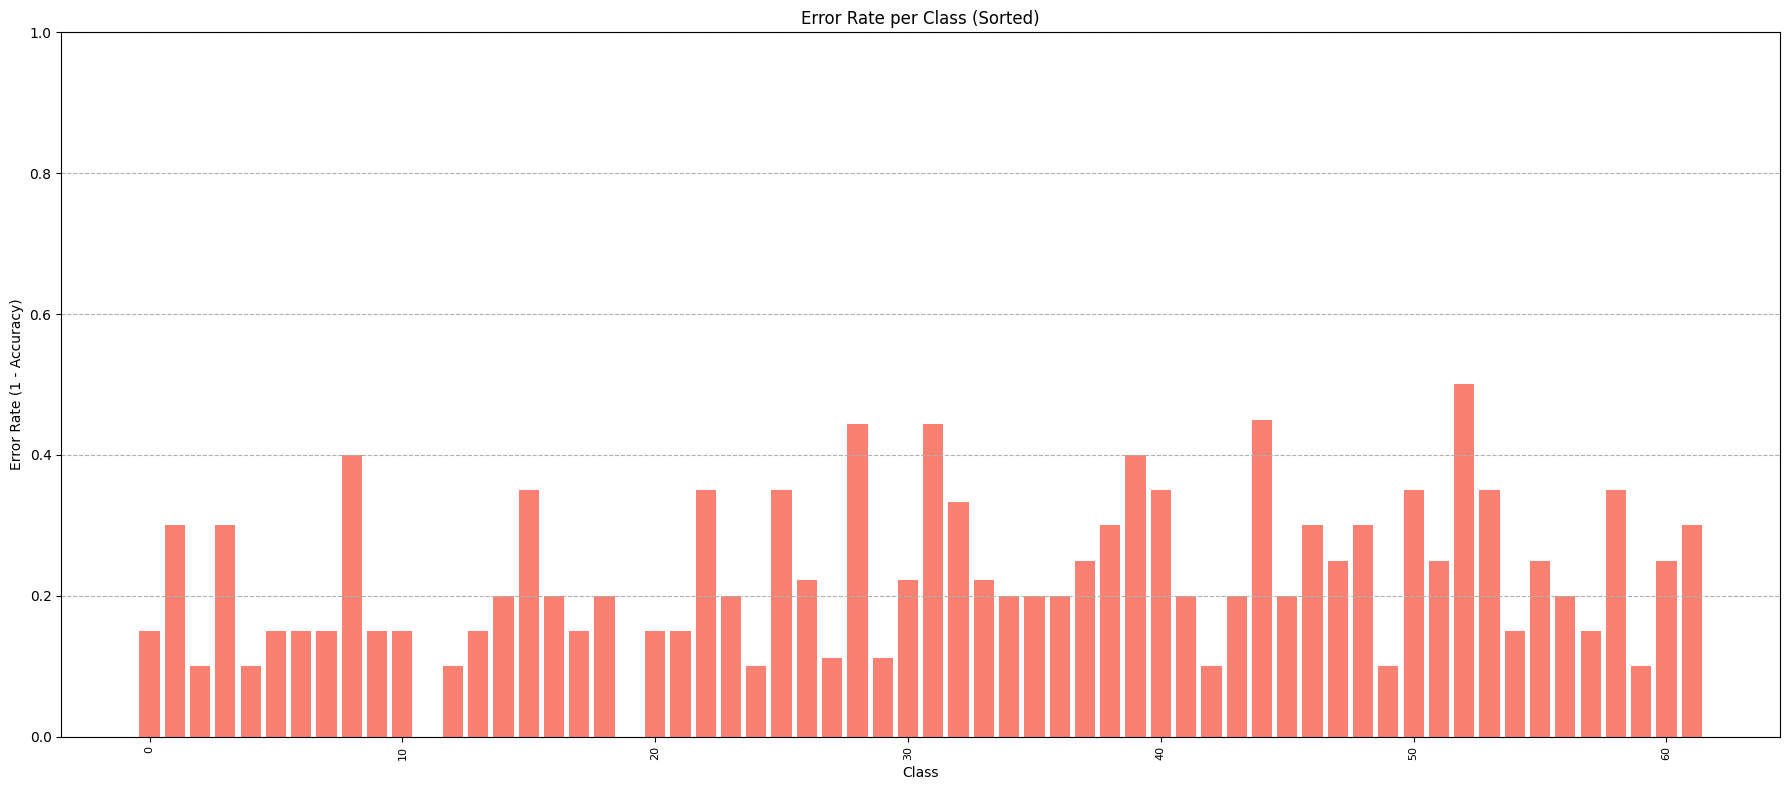

In [47]:
# Error Rate per Class (Sorted)
print("\n Error Rate per Class (Sorted) ---")
class_errors = []
for i in range(len(class_names)):
    class_mask = (y_test == i)
    total_in_class = np.sum(class_mask)
    if total_in_class > 0:
        incorrect_predictions_in_class = np.sum((y_pred[class_mask] != y_test[class_mask]))
        class_errors.append((class_names[i], incorrect_predictions_in_class / total_in_class))
    else:
        class_errors.append((class_names[i], 0)) # No samples for this class

class_errors.sort(key=lambda x: x[1], reverse=True) # Sort by error rate descending

error_labels = [item[0] for item in class_errors]
error_rates = [item[1] for item in class_errors]

plt.figure(figsize=(18, 8))
plt.bar(error_labels, error_rates, color='salmon')
plt.xlabel('Class')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.title('Error Rate per Class (Sorted)')
plt.xticks(rotation=90, fontsize=8)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()



 ROC Curve (One-vs-Rest) for Selected Classes ---


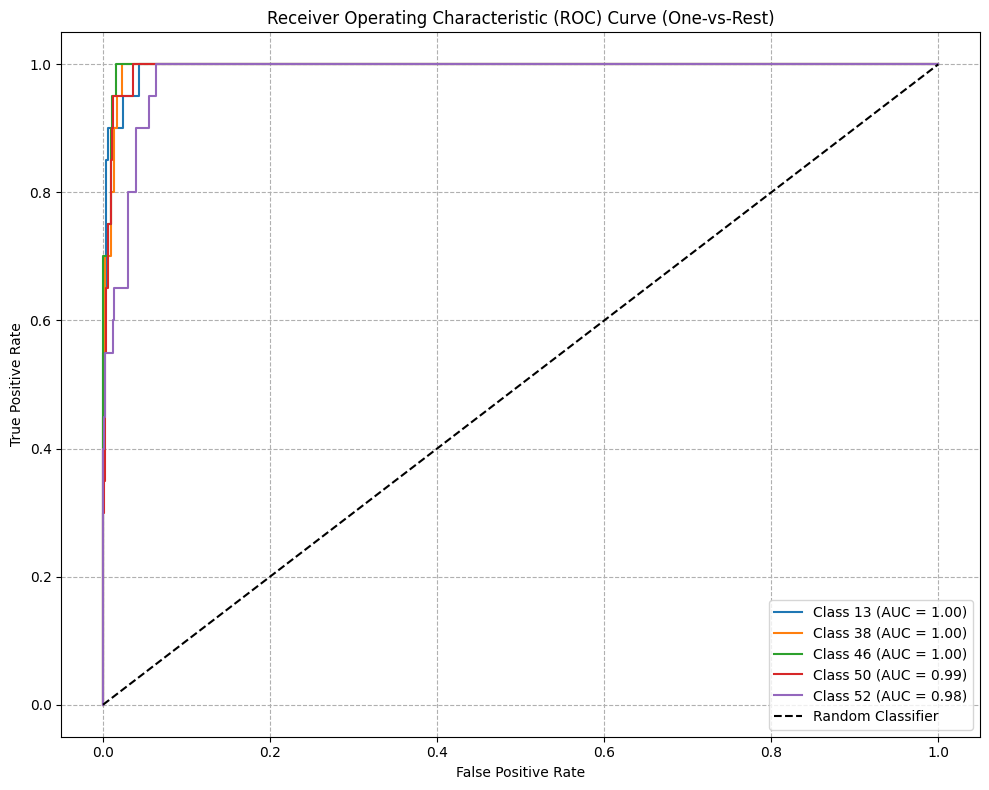

In [48]:
# ROC Curve for a few representative classes (One-vs-Rest)
print("\n ROC Curve (One-vs-Rest) for Selected Classes ---")
# Binarize the true labels for ROC curve calculation
y_test_binarized = label_binarize(y_test, classes=range(len(class_names)))

# Select a few classes to plot ROC curves for (e.g., first 5, or some interesting ones)
num_classes_to_plot = min(5, len(class_names))
# Ensure selected classes actually have samples in the test set
available_classes = np.where(np.sum(y_test_binarized, axis=0) > 0)[0]
if len(available_classes) > 0:
    selected_classes_indices = np.random.choice(available_classes, min(num_classes_to_plot, len(available_classes)), replace=False)
    selected_classes_indices.sort() # For consistent plotting

    plt.figure(figsize=(10, 8))
    for i in selected_classes_indices:
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)')
    plt.legend(loc='lower right')
    plt.grid(linestyle='--')
    plt.tight_layout()
    plt.show()
else:
    print("No classes with samples in the test set to plot ROC curves.")
